# **📃<font color=#003189c>Predicting Loan Default: A Data-Driven Approach</font> Calculation with Python💳**</font>

## **Content**

- **1) Problem statement**
- **2) Expectations**
- **3) Concept Used**
- **4) Libraries**
- **5) Exploring the data**
- **6) Observations on Data**
- **7) Data preprocessing**
    - 7.1) Checking for Unique Values and Duplicates
    - 7.2) Missing value treatment and Cleaning
    - 7.3) Feature Engineering
        - 1. Credit Score Rating
        - 2. Income to Debt Ratio
        - 3. Loan Interest Cost    
- **8) Exploratory data analysis**
    - 8.1) Univariate Analysis
    - 8.2) Bivariate Analysis
- **9) Hypothetical Loan default risk**
    - 9.1) Calculate credit score
    - 9.2) Bin scores
        - 9.2.1) Distribution of Credit Scores
    - 9.3) Time Frame Analysis for last 3 months
        - 9.3.1) Calculate RFM
        - 9.3.2) Distribution of Credit Scores
- **10) Analysis and Insights**  

## **1) <font color=#003189c>Problem</font> statement👀**
- **Minimizing Loan Default Risks:** The objective is to analyze the impact of various factors, such as loan type, loan purpose, business or commercial nature, and credit score, on the risk of loan defaults. This helps lending institutions assess the likelihood of a borrower defaulting on a loan.

- **Correlation and Insights for Risk Management:** Investigating the correlation between financial variables like upfront charges, loan amount, interest rates, and property values with default tendencies. The goal is to uncover patterns that can improve risk assessment strategies and help lenders make more informed and proactive decisions to prevent loan defaults.

## **2) Expectations**
The project aims to develop a strong understanding of risk analytics in banking and financial services, focusing on how data can be leveraged to reduce the risk of loan defaults. It expects to analyze the influence of factors such as loan type, loan purpose, business nature, and credit score on defaults, while also investigating correlations between upfront charges, loan amounts, interest rates, and property values. By uncovering patterns and insights, the project seeks to improve risk assessment strategies for lending institutions, enabling better decision-making and proactive measures to minimize potential losses.

## **3) Concept Used📑**
- Exploratory Data Analysis
- Data Visualization and Reporting
- Customer Segmentation

## **4) Libraries📚**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **5) Exploring the data...🔎**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls '/content/drive/My Drive/Colab Notebooks/'

'Copy of Welcome to Colaboratory'		  SaranyaS_Walmart_CaseStudy.ipynb
'Credit-EDA-and-scoring - by SMS.ipynb'		  SaranyaS_Yulu_Hypothesis.ipynb
'Customers Credit Score Analysis'		  strings_2.ipynb
'Funding Startup EDA'				  Untitled0.ipynb
 loan.csv					  Untitled1.ipynb
'Loan Default Project'				  Untitled2.ipynb
'Maize Production_ Consolidated_analysis.ipynb'   Untitled3.ipynb
 Saranya_Aerofit_BusinessCase


In [5]:
file_path = '/content/drive/My Drive/Colab Notebooks/loan.csv'

In [6]:
df = pd.read_csv(file_path)
df.head(25)


,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,NaN,NaN,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,24891,2019,cf,Male,type2,p1,b/c,206500,NaN,NaN,NaN,pr,4980.0,EQUI,552,EXP,55-64,NaN,North,1
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.560,595.00,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.250,NaN,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.000,0.00,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0
5,24895,2019,cf,Joint,type1,p1,nob/c,706500,3.990,370.00,1008000.0,pr,10080.0,EXP,864,EXP,35-44,70.089286,North,0
6,24896,2019,cf,Joint,type1,p3,nob/c,346500,4.500,5120.00,438000.0,pr,5040.0,EXP,860,EXP,55-64,79.109589,North,0
7,24897,2019,NaN,Female,type1,p4,nob/c,266500,4.125,5609.88,308000.0,pr,3780.0,CIB,863,CIB,55-64,86.525974,North,0
8,24898,2019,cf,Joint,type1,p3,nob/c,376500,4.875,1150.00,478000.0,pr,5580.0,CIB,580,EXP,55-64,78.765690,central,0
9,24899,2019,cf,Sex Not Available,type3,p3,nob/c,436500,3.490,2316.50,688000.0,pr,6720.0,CIB,788,EXP,55-64,63.444767,south,0


In [7]:
df.shape

(148670, 20)

In [8]:
df=df.dropna(how='all')

In [9]:
df.shape

(148670, 20)

In [10]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Upfront_charges', 'property_value', 'occupancy_type', 'income',
       'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'LTV',
       'Region', 'Status'],
      dtype='object')

**🔍OBSERVATION🔎**

The dataset has **1,48,670 rows** and **20 columns**

**Column Name Description:**
1. **ID:** Id for each row  
2. **Year:** Year when the loan was taken  
3. **Loan Limit:** If the loan limit is fixed or variable (cf-confirm/fixed, ncf-not confirm/not fixed)  
4. **Gender:** Gender of the applicant (can be male, female, not specified, joint - in case of applying as a couple for home loan)  
5. **Loan Type:** Type of loan (masked data) (type-1, type-2, type-3)  
6. **Loan Purpose:** Purpose of the loan (masked data) (p1, p2, p3, p4)  
7. **Business or Commercial:** If the loan is for a commercial establishment or personal establishment  
8. **Loan Amount:** Amount of the loan  
9. **Rate of Interest:** Rate of interest for the loan  
10. **Upfront Charges:** Down payment done by the applicant  
11. **Property Value:** Value of the property being constructed for which the loan is taken  
12. **Occupancy Type:** Type of occupancy for the establishment  
13. **Income:** Income of the applicant  
14. **Credit Type:** Credit type options ('EXP', 'EQUI', 'CRIF', 'CIB')  
15. **Credit Score:** Credit score of the applicant  
16. **Co-Applicant Credit Type:** Credit type for the co-applicant  
17. **Age:** Age of the applicant  
18. **LTV:** Lifetime value of the applicant  
19. **Region:** Region of the applicant  
20. **Status:** Defaulter (1) or normal (0)  

## **6) Observations on Data👀**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148670 non-null  int64  
 1   year                      148670 non-null  int64  
 2   loan_limit                145326 non-null  object 
 3   Gender                    148670 non-null  object 
 4   loan_type                 148670 non-null  object 
 5   loan_purpose              148536 non-null  object 
 6   business_or_commercial    148670 non-null  object 
 7   loan_amount               148670 non-null  int64  
 8   rate_of_interest          112231 non-null  float64
 9   Upfront_charges           109028 non-null  float64
 10  property_value            133572 non-null  float64
 11  occupancy_type            148670 non-null  object 
 12  income                    139520 non-null  float64
 13  credit_type               148670 non-null  o

In [12]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Upfront_charges,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.0,1.486700e+05,112231.000000,109028.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,3224.996127,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,0.0,1.839093e+05,0.561391,3251.121510,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,24890.000000,2019.0,1.650000e+04,0.000000,0.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,581.490000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,2596.450000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,4812.500000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,60000.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


In [13]:
df.describe(include='O')

,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,occupancy_type,credit_type,co-applicant_credit_type,age,Region
count,145326,148670,148670,148536,148670,148670,148670,148670,148470,148670
unique,2,4,3,4,2,3,4,2,7,4
top,cf,Male,type1,p3,nob/c,pr,CIB,CIB,45-54,North
freq,135348,42346,113173,55934,127908,138201,48152,74392,34720,74722


## **7) Data preprocessing🎰**

### <font color=#00836c>**7.1) Checking for Unique values and Duplciates👬**</font>

In [14]:
df.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
loan_type,0
loan_purpose,134
business_or_commercial,0
loan_amount,0
rate_of_interest,36439
Upfront_charges,39642


In [15]:
df.nunique()

,0
ID,148670
year,1
loan_limit,2
Gender,4
loan_type,3
loan_purpose,4
business_or_commercial,2
loan_amount,211
rate_of_interest,131
Upfront_charges,58271


In [16]:
# Creating a deep copy
data = df.copy()

### <font color=#00836c>**7.2) Missing value treatment and Cleaning🧹**</font>

In [17]:
# How many percentage of data is missing in each column
missing_value = pd.DataFrame({'Missing Value': df.isnull().sum(), 'Percentage': (((df.isnull().sum() / len(df))*100)).round(2)})
missing_value.sort_values(by='Percentage', ascending=False, inplace=True)
missing_value

,Missing Value,Percentage
Upfront_charges,39642,26.66
rate_of_interest,36439,24.51
property_value,15098,10.16
LTV,15098,10.16
income,9150,6.15
loan_limit,3344,2.25
age,200,0.13
loan_purpose,134,0.09
Region,0,0.00
co-applicant_credit_type,0,0.00


#### <font color=#fa7f22>**1. ID**</font>

In [18]:
df['ID'].isna().sum()

0

In [19]:
df['ID'].duplicated().any()

False

**🔍OBSERVATION🔎**
- The column is clean

#### <font color=#fa7f22>**2. Year**</font>

In [20]:
df['year'].isna().sum()

0

In [21]:
df['year'].value_counts()

,count
year,
2019,148670


**🔍OBSERVATION🔎**
- The column is clean

#### <font color=#fa7f22>**3. Loan Limit**</font>

In [22]:
df['loan_limit'].isna().sum()

3344

In [23]:
df['loan_limit'].value_counts()

,count
loan_limit,
cf,135348
ncf,9978


In [24]:
df['loan_limit']=df.groupby(['loan_type','business_or_commercial'])['loan_limit'].transform(lambda x: x.fillna(x.mode()[0]))

In [25]:
df['loan_limit'].isna().sum()

0

In [26]:
df['loan_limit'].value_counts()

,count
loan_limit,
cf,138692
ncf,9978


**🔍OBSERVATION🔎**
- This column has been dealt by filling null values with mode after group by based on Loan type and Business or Commercial column.

#### <font color=#fa7f22>**4. Gender**</font>

In [27]:
df['Gender'].isna().sum()

0

In [28]:
df['Gender'].value_counts()

,count
Gender,
Male,42346
Joint,41399
Sex Not Available,37659
Female,27266


**🔍OBSERVATION🔎**
- This column is clean

#### <font color=#fa7f22>**5. Loan Type**</font>

In [29]:
df['loan_type'].isna().sum()

0

In [30]:
df['loan_type'].value_counts()

,count
loan_type,
type1,113173
type2,20762
type3,14735


**🔍OBSERVATION🔎**
- This column is clean

#### <font color=#fa7f22>**6. Loan Purpose**</font>

In [31]:
df['loan_purpose'].isna().sum()

134

In [32]:
df['loan_purpose'].value_counts()

,count
loan_purpose,
p3,55934
p4,54799
p1,34529
p2,3274


In [33]:
proportions = df['loan_purpose'].value_counts(normalize=True)

In [34]:
print(proportions)
num_values=df['loan_purpose'].isna().sum()

loan_purpose
p3    0.376569
p4    0.368927
p1    0.232462
p2    0.022042
Name: proportion, dtype: float64


In [35]:
random_choices = np.random.choice(proportions.index, size=num_values, p=proportions.values)

In [36]:
df.loc[df['loan_purpose'].isnull(),'loan_purpose'] = random_choices

In [37]:
df['loan_purpose'].value_counts()

,count
loan_purpose,
p3,55990
p4,54844
p1,34559
p2,3277


In [38]:
df['loan_purpose'].isnull().sum()

0

**🔍OBSERVATION🔎**
- This column has null values and it has been dealt by taking value proportions and filling random choices according to proportions.

#### <font color=#fa7f22>**7. Business Or Commercial**</font>

In [39]:
df['business_or_commercial'].isna().sum()

0

In [40]:
df['business_or_commercial'].value_counts()

,count
business_or_commercial,
nob/c,127908
b/c,20762


**🔍OBSERVATION🔎**
- This column is clean

#### <font color=#fa7f22>**8. Loan Amount**</font>

In [41]:
df['loan_amount'].isnull().sum()

0

In [42]:
df['loan_amount'].max()

3576500

In [43]:
df['loan_amount'].min()

16500

In [44]:
df['loan_amount'].mean()

331117.7439967714

In [45]:
df['loan_amount'].median()

296500.0

In [46]:
df['loan_amount'].describe()

,loan_amount
count,1.486700e+05
mean,3.311177e+05
std,1.839093e+05
min,1.650000e+04
25%,1.965000e+05
50%,2.965000e+05
75%,4.365000e+05
max,3.576500e+06


**🔍OBSERVATION🔎**
- This column is clean

#### <font color=#fa7f22>**9. Rate of Interest**</font>

In [47]:
df['rate_of_interest'].isnull().sum()

36439

In [48]:
df['rate_of_interest']= df['rate_of_interest'].round(2)

In [49]:
df['rate_of_interest'].describe()

,rate_of_interest
count,112231.000000
mean,4.045608
std,0.561583
min,0.000000
25%,3.620000
50%,3.990000
75%,4.380000
max,8.000000


In [50]:
df['rate_of_interest'] = df.groupby(pd.cut(df['loan_amount'], bins=[0, 200000, 400000, 800000,3600000]))['rate_of_interest'].transform(lambda x: x.fillna(x.median()))


<ipython-input-50-362ee32edfb1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['rate_of_interest'] = df.groupby(pd.cut(df['loan_amount'], bins=[0, 200000, 400000, 800000,3600000]))['rate_of_interest'].transform(lambda x: x.fillna(x.median()))


In [51]:
df['rate_of_interest'].isnull().sum()

0

In [52]:
df['rate_of_interest'].describe()

,rate_of_interest
count,148670.000000
mean,4.051185
std,0.491826
min,0.000000
25%,3.750000
50%,3.990000
75%,4.250000
max,8.000000


**🔍OBSERVATION🔎**
- This column has null values.
- The values were first rounded off to 2 decimals
- The null values has been filled with median value after creating bins based on loan amount

#### <font color=#fa7f22>**10. Upfront Charges**</font>

In [53]:
df['Upfront_charges'].isnull().sum()

39642

In [54]:
df['Upfront_charges'].describe()

,Upfront_charges
count,109028.000000
mean,3224.996127
std,3251.121510
min,0.000000
25%,581.490000
50%,2596.450000
75%,4812.500000
max,60000.000000


In [55]:
df['Upfront_charges']= df['Upfront_charges'].round(2)

In [56]:
df['Upfront_charges'] = df.groupby(pd.cut(df['loan_amount'], bins=[0, 200000, 400000, 800000,3600000]))['Upfront_charges'].transform(lambda x: x.fillna(x.median()))

<ipython-input-56-954fe03e3569>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Upfront_charges'] = df.groupby(pd.cut(df['loan_amount'], bins=[0, 200000, 400000, 800000,3600000]))['Upfront_charges'].transform(lambda x: x.fillna(x.median()))


In [57]:
df['Upfront_charges'].describe()

,Upfront_charges
count,148670.000000
mean,3034.375182
std,2827.847564
min,0.000000
25%,1250.000000
50%,2826.250000
75%,3889.495000
max,60000.000000


In [58]:
df['Upfront_charges'].isnull().sum()

0

**🔍OBSERVATION🔎**
- This column has null values.
- The values were first rounded off to 2 decimals
- The null values has been filled with median value after creating bins based on loan amount

#### <font color=#fa7f22>**11. Property Value**</font>

In [59]:
df['property_value'].isnull().sum()

15098

In [60]:
df['property_value'].describe()

,property_value
count,1.335720e+05
mean,4.978935e+05
std,3.599353e+05
min,8.000000e+03
25%,2.680000e+05
50%,4.180000e+05
75%,6.280000e+05
max,1.650800e+07


In [61]:
df['property_value']=df.groupby(pd.cut(df['loan_amount'], bins=[0, 100000, 200000, 400000, 800000,1200000, 3600000]))['property_value'].transform(lambda x: x.fillna(x.median()))

<ipython-input-61-1f1b89911384>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['property_value']=df.groupby(pd.cut(df['loan_amount'], bins=[0, 100000, 200000, 400000, 800000,1200000, 3600000]))['property_value'].transform(lambda x: x.fillna(x.median()))


In [62]:
df['property_value'].describe()

,property_value
count,1.486700e+05
mean,4.922527e+05
std,3.506106e+05
min,8.000000e+03
25%,2.680000e+05
50%,4.080000e+05
75%,6.280000e+05
max,1.650800e+07


In [63]:
df['property_value'].isnull().sum()

0

In [64]:
df['property_value']= df['property_value'].round(2)

**🔍OBSERVATION🔎**
- This column has null values.
- The values were first rounded off to 2 decimals
- The null values has been filled with median value after creating bins based on loan amount

#### <font color=#fa7f22>**12. Occupancy type**</font>

In [65]:
df['occupancy_type'].isnull().sum()

0

In [66]:
df['occupancy_type'].value_counts()

,count
occupancy_type,
pr,138201
ir,7340
sr,3129


**🔍OBSERVATION🔎**
- This column is clean

#### <font color=#fa7f22>**13. Income**</font>

In [67]:
df['income'].isnull().sum()

9150

In [68]:
df['income'].describe()

,income
count,139520.000000
mean,6957.338876
std,6496.586382
min,0.000000
25%,3720.000000
50%,5760.000000
75%,8520.000000
max,578580.000000


In [69]:
df['income']=df['income'].round(2)

In [70]:
df['income']=df.groupby(pd.cut(df['loan_amount'], bins=[0, 100000, 200000, 400000, 800000,1200000, 3600000]))['income'].transform(lambda x: x.fillna(x.median()))

<ipython-input-70-b3cef3b094e4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['income']=df.groupby(pd.cut(df['loan_amount'], bins=[0, 100000, 200000, 400000, 800000,1200000, 3600000]))['income'].transform(lambda x: x.fillna(x.median()))


In [71]:
df['income'].describe()

,income
count,148670.000000
mean,6921.643304
std,6319.398736
min,0.000000
25%,3780.000000
50%,5640.000000
75%,8580.000000
max,578580.000000


In [72]:
df['income'].isnull().sum()

0

**🔍OBSERVATION🔎**
- This column has null values.
- The values were first rounded off to 2 decimals
- The null values has been filled with median value after creating bins based on loan amount

#### <font color=#fa7f22>**14.Credit type**</font>

**CIBIL, Experian, CRIF, and Equifax are all credit bureaus that provide credit scores and reports to help lenders evaluate the creditworthiness of borrowers.**
>These reports help financial institutions assess the risk involved in lending to individuals or businesses.

In [73]:
df['credit_type'].isnull().sum()

0

In [74]:
df['credit_type'].value_counts()

,count
credit_type,
CIB,48152
CRIF,43901
EXP,41319
EQUI,15298


**🔍OBSERVATION🔎**
- This column is clean

#### <font color=#fa7f22>**15. Credit Score**</font>

In [75]:
df['Credit_Score'].isnull().sum()

0

In [76]:
df['Credit_Score'].describe()

,Credit_Score
count,148670.000000
mean,699.789103
std,115.875857
min,500.000000
25%,599.000000
50%,699.000000
75%,800.000000
max,900.000000


**🔍OBSERVATION🔎**
- This column is clean

#### <font color=#fa7f22>**16. CoApplicant Credit Type**</font>

In [77]:
df['co-applicant_credit_type'].isna().sum()

0

In [78]:
df['co-applicant_credit_type'].value_counts()

,count
co-applicant_credit_type,
CIB,74392
EXP,74278


**🔍OBSERVATION🔎**
- This column is clean

#### <font color=#fa7f22>**17. Age**</font>

In [79]:
df['age'].isna().sum()

200

In [80]:
df['age'].value_counts()

,count
age,
45-54,34720
35-44,32818
55-64,32534
65-74,20744
25-34,19142
>74,7175
<25,1337


In [81]:
df['age']= df.groupby(['Gender','loan_purpose'])['age'].transform(lambda x: x.fillna(x.mode()[0]))

In [82]:
df['age'].isna().sum()

0

In [83]:
df['age'].value_counts()

,count
age,
45-54,34757
35-44,32910
55-64,32605
65-74,20744
25-34,19142
>74,7175
<25,1337


**🔍OBSERVATION🔎**
- This column has been dealt by filling mode value after group by based on Gender and Loan purpose

#### <font color=#fa7f22>**18. Loan to value ratio**</font>

In [84]:
df['LTV'].isnull().sum()

15098

In [85]:
df['LTV'].describe()

,LTV
count,133572.000000
mean,72.746457
std,39.967603
min,0.967478
25%,60.474860
50%,75.135870
75%,86.184211
max,7831.250000


In [86]:
df['LTV']=df['LTV'].round(2)

In [87]:
df['LTV']=df['LTV'].fillna((df['loan_amount']/df['property_value'])*100)

In [88]:
df['LTV'].isna().sum()

0

In [89]:
df['LTV'].describe()

,LTV
count,148670.000000
mean,72.807992
std,38.167522
min,0.970000
25%,60.820000
50%,75.060000
75%,85.960000
max,7831.250000


**🔍OBSERVATION🔎**
- This column has been dealt with the formula (loan_amount/property_value)*100

#### <font color=#fa7f22>**19. Region**</font>

In [90]:
df['Region'].isna().sum()

0

In [91]:
df['Region'].value_counts()

,count
Region,
North,74722
south,64016
central,8697
North-East,1235


**🔍OBSERVATION🔎**
- This column is clean

#### <font color=#fa7f22>**20. Status**</font>

In [92]:
df['Status'].isna().sum()

0

In [93]:
df['Status'].value_counts()

,count
Status,
0,112031
1,36639


**🔍OBSERVATION🔎**
- This column is clean

In [94]:
df.isna().sum()

,0
ID,0
year,0
loan_limit,0
Gender,0
loan_type,0
loan_purpose,0
business_or_commercial,0
loan_amount,0
rate_of_interest,0
Upfront_charges,0


**🔍OBSERVATION🔎**
- All null values are addressed

### <font color=#00836c>**7.3) Feature Engineering🔩🪛**</font>

#### <font color=#fa7f22>**1. Credit Score Rating**</font>

In [95]:
bins=[0,500,600,700,800,float('inf')]
labels=['Poor','Fair','Good','Great','Excellent']
df['Credit_Score_rating']=pd.cut(df['Credit_Score'],bins=bins,labels=labels)
df['Credit_Score_rating'].value_counts(normalize=True)*100

,proportion
Credit_Score_rating,
Good,25.053474
Fair,25.014462
Excellent,24.970741
Great,24.721195
Poor,0.240129


In [96]:
df['Credit_Score_rating'].dtype

CategoricalDtype(categories=['Poor', 'Fair', 'Good', 'Great', 'Excellent'], ordered=True, categories_dtype=object)

#### <font color=#fa7f22>**2. Debt to Income Ratio**</font>



In [97]:
df['Income-to-Debt Ratio']= (df['income']/df['loan_amount'])*100

#### <font color=#fa7f22>**3. Loan Interest Cost**</font>



In [98]:
df['Loan_interest_cost']=df['loan_amount']*df['rate_of_interest']/100

### <font color=#00836c>**7.4) Statistical Summary 🧮🧮**</font>

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.00,62057.250000,99224.500000,136391.750000,1.735590e+05
year,148670.0,2019.000000,0.000000,2019.00,2019.000000,2019.000000,2019.000000,2.019000e+03
loan_amount,148670.0,331117.743997,183909.310127,16500.00,196500.000000,296500.000000,436500.000000,3.576500e+06
rate_of_interest,148670.0,4.051185,0.491826,0.00,3.750000,3.990000,4.250000,8.000000e+00
Upfront_charges,148670.0,3034.375182,2827.847564,0.00,1250.000000,2826.250000,3889.495000,6.000000e+04
property_value,148670.0,492252.707338,350610.645019,8000.00,268000.000000,408000.000000,628000.000000,1.650800e+07
income,148670.0,6921.643304,6319.398736,0.00,3780.000000,5640.000000,8580.000000,5.785800e+05
Credit_Score,148670.0,699.789103,115.875857,500.00,599.000000,699.000000,800.000000,9.000000e+02
LTV,148670.0,72.807992,38.167522,0.97,60.820000,75.060000,85.960000,7.831250e+03
Status,148670.0,0.246445,0.430942,0.00,0.000000,0.000000,0.000000,1.000000e+00


In [100]:
df.describe(include='O').T

,count,unique,top,freq
loan_limit,148670,2,cf,138692
Gender,148670,4,Male,42346
loan_type,148670,3,type1,113173
loan_purpose,148670,4,p3,55990
business_or_commercial,148670,2,nob/c,127908
occupancy_type,148670,3,pr,138201
credit_type,148670,4,CIB,48152
co-applicant_credit_type,148670,2,CIB,74392
age,148670,7,45-54,34757
Region,148670,4,North,74722


## **8) Exploratory data analysis**📊📈

---



### <font color=#00836c>**8.1) Univariate Analysis📈**</font>

In [142]:
import warnings
warnings.filterwarnings("ignore")

Univariate Analysis for: loan_limit
loan_limit
cf     138692
ncf      9978
Name: count, dtype: int64
loan_limit
cf     93.288491
ncf     6.711509
Name: proportion, dtype: float64


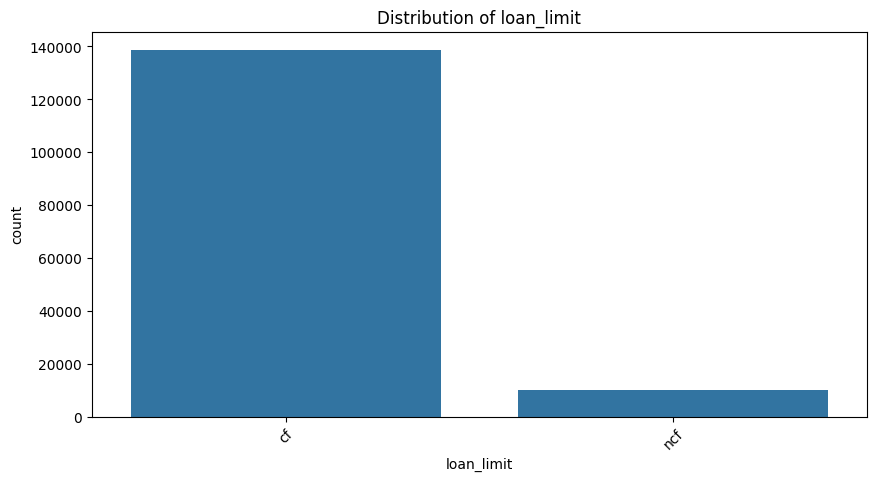



Univariate Analysis for: Gender
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64
Gender
Male                 28.483218
Joint                27.846237
Sex Not Available    25.330598
Female               18.339948
Name: proportion, dtype: float64


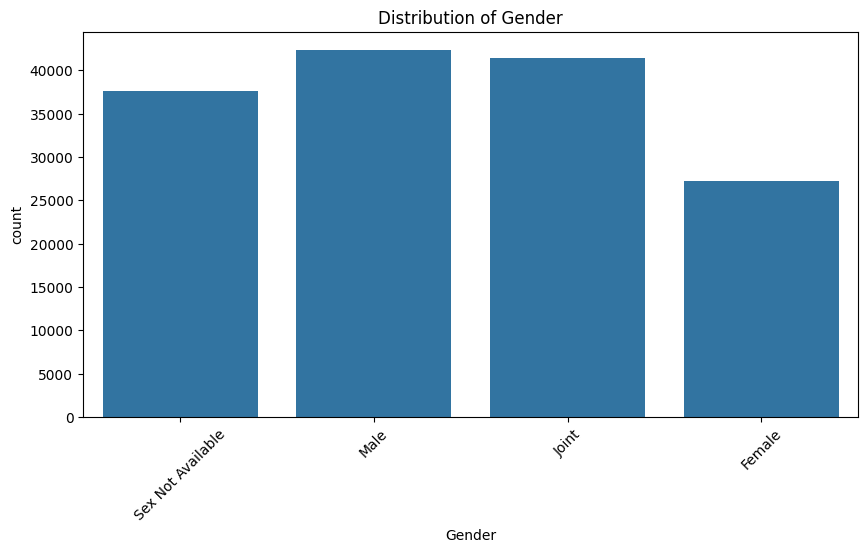



Univariate Analysis for: loan_type
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64
loan_type
type1    76.123630
type2    13.965158
type3     9.911213
Name: proportion, dtype: float64


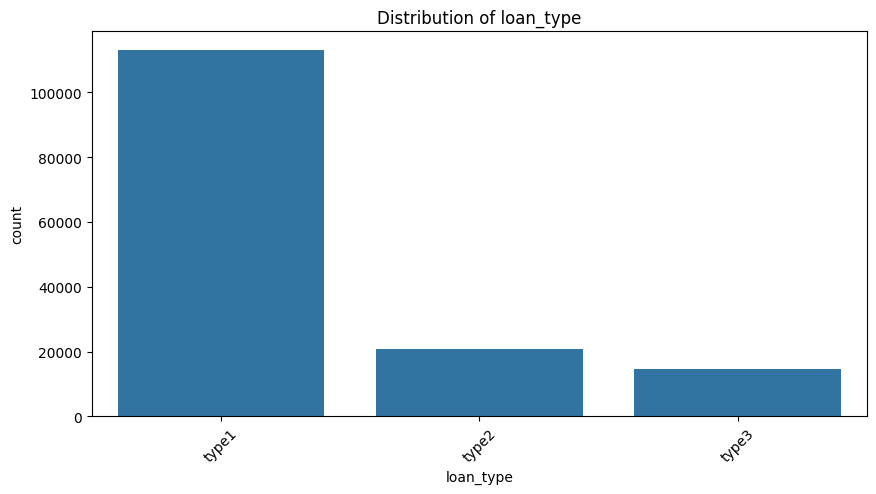



Univariate Analysis for: loan_purpose
loan_purpose
p3    55990
p4    54844
p1    34559
p2     3277
Name: count, dtype: int64
loan_purpose
p3    37.660591
p4    36.889756
p1    23.245443
p2     2.204211
Name: proportion, dtype: float64


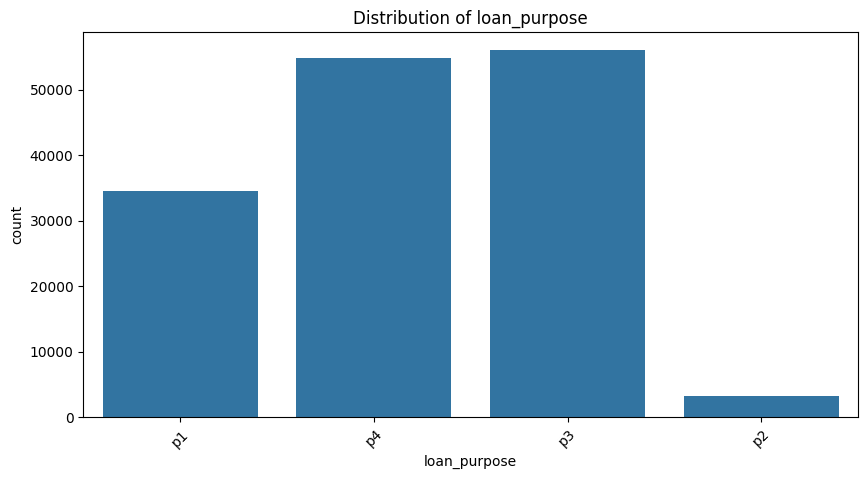



Univariate Analysis for: business_or_commercial
business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64
business_or_commercial
nob/c    86.034842
b/c      13.965158
Name: proportion, dtype: float64


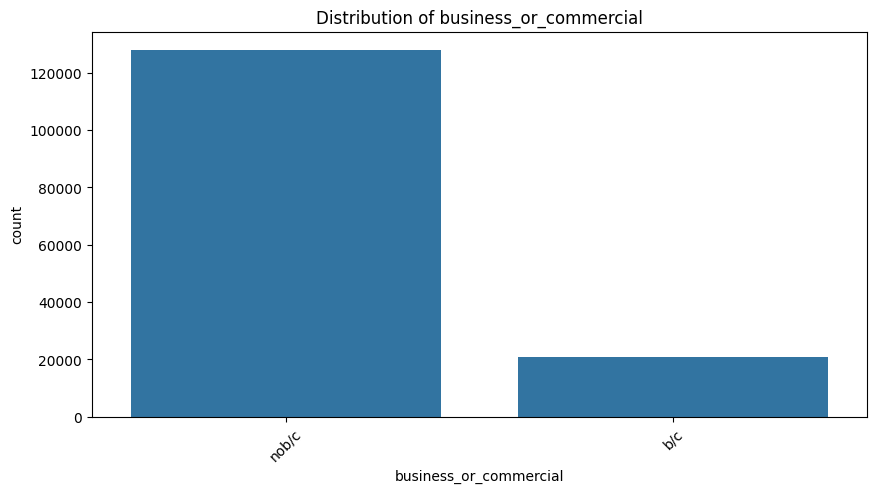



Univariate Analysis for: occupancy_type
occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64
occupancy_type
pr    92.958230
ir     4.937109
sr     2.104661
Name: proportion, dtype: float64


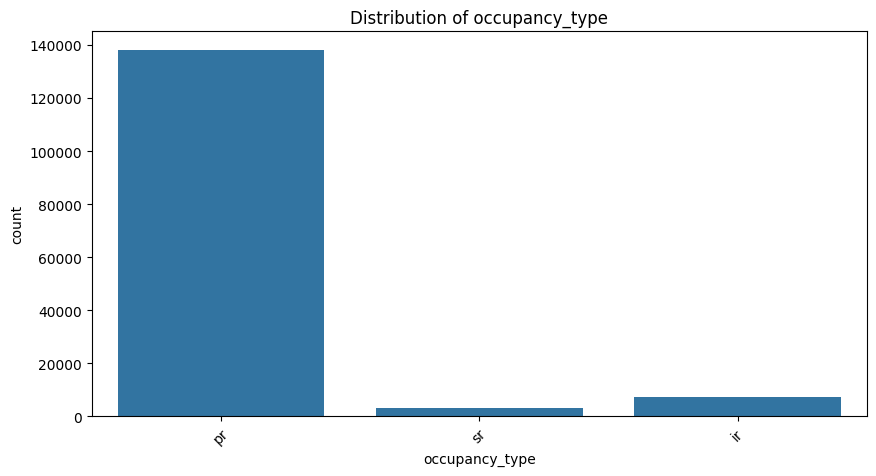



Univariate Analysis for: credit_type
credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64
credit_type
CIB     32.388511
CRIF    29.529159
EXP     27.792426
EQUI    10.289904
Name: proportion, dtype: float64


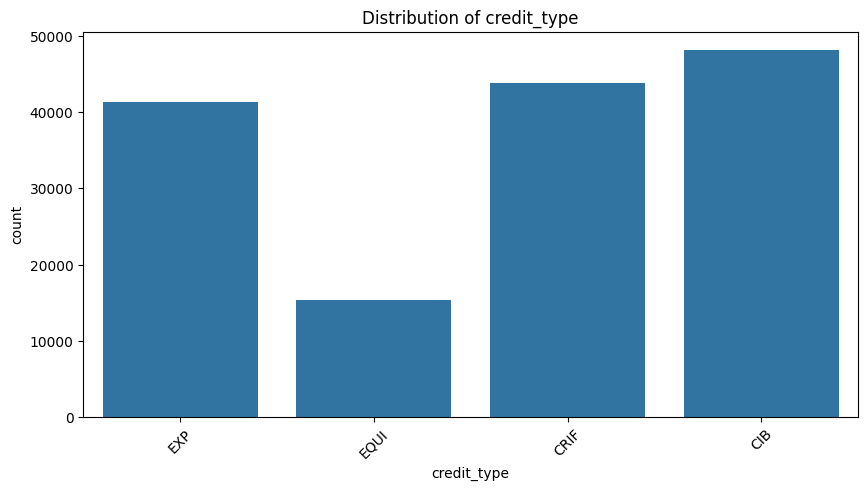



Univariate Analysis for: co-applicant_credit_type
co-applicant_credit_type
CIB    74392
EXP    74278
Name: count, dtype: int64
co-applicant_credit_type
CIB    50.03834
EXP    49.96166
Name: proportion, dtype: float64


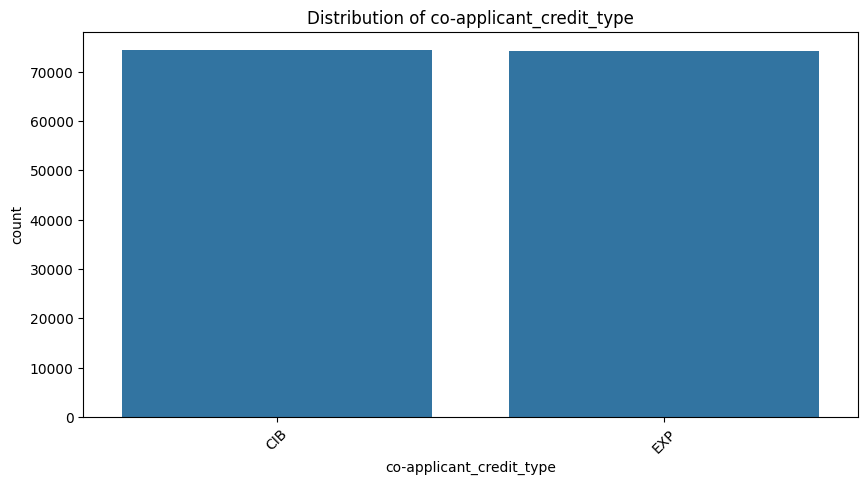



Univariate Analysis for: age
age
45-54    34757
35-44    32910
55-64    32605
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64
age
45-54    23.378624
35-44    22.136275
55-64    21.931123
65-74    13.953050
25-34    12.875496
>74       4.826125
<25       0.899307
Name: proportion, dtype: float64


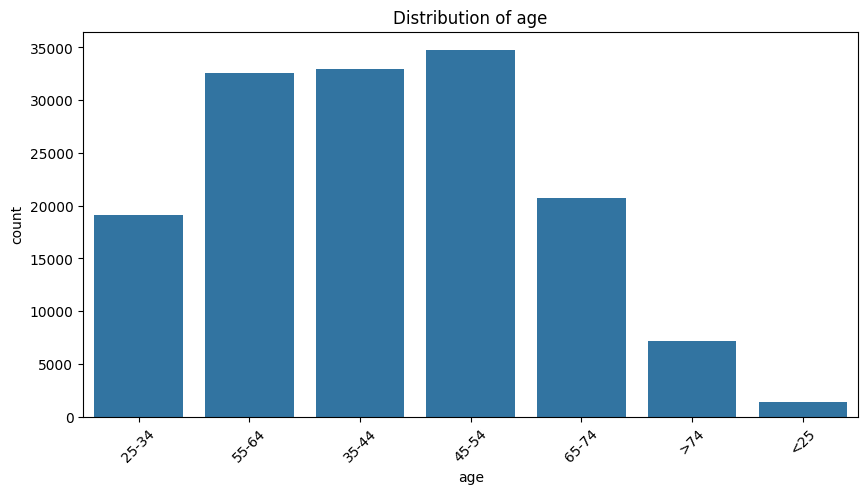



Univariate Analysis for: Region
Region
North         74722
south         64016
central        8697
North-East     1235
Name: count, dtype: int64
Region
North         50.260308
south         43.059124
central        5.849869
North-East     0.830699
Name: proportion, dtype: float64


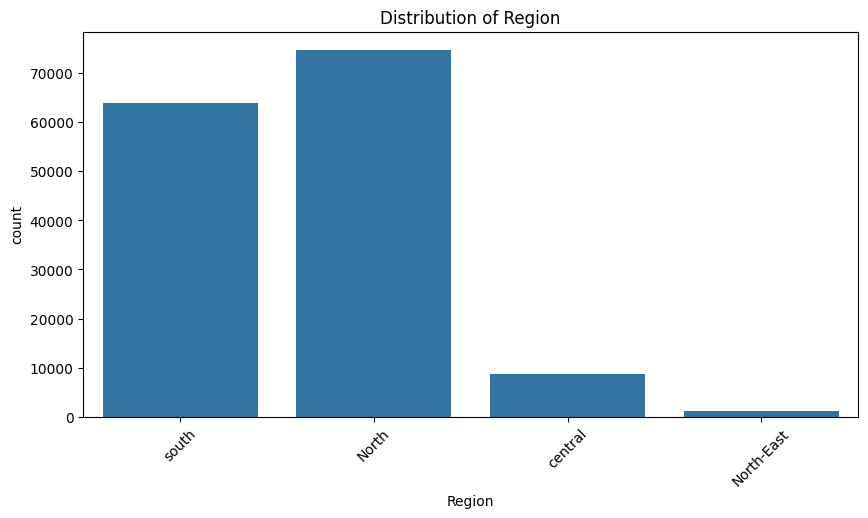

In [102]:
# Create univariate analysis for categorical columns
for column in df.select_dtypes(include=['object']).columns:
  print(f"Univariate Analysis for: {column}")
  print(df[column].value_counts())
  print(df[column].value_counts(normalize=True) * 100)  # Percentage distribution
  plt.figure(figsize=(10, 5))
  sns.countplot(x=column, data=df)
  plt.title(f"Distribution of {column}")
  plt.xticks(rotation=45)
  plt.show()
  print("\n")


**🔍OBSERVATION🔎**

- **Loan Limit**
    - 93% of data shows loan limit is fixed, this shows default lending approach by banks or customer preferences for fixed loan types
- **Loan type**
    - Loan type 1 is the most common.
- **Loan purpose**
    - P3 and P4 is the most common loan purpose, this could indicate growing demand in that sector, while P2 is the least common with only 2%
- **Gender**
    - 18% female lenders might indicate targeted lending practices or unequal access. But the joint account and Sex Not available may contain good proportion of females.

- **Age**
    - 60% of the loan customers are on the age scale of 35-64, which represents people mostly in the stable income category. This means there is less chance of defaults in this age range.

- **Region**
    - North and South region is over represented compared to Central and Nort-east. This could imply that particular regions are more reliant on credit, or under-representation could indicate untapped markets.

- **Occupancy**
    - 92% of the loans have the occupancy type as Primary residence, indicates a focus on residential property ownership

- **Business or Commercial**
    - 86% of loans are for non commercial purpose, this means there is less chances of default in these cases, where business loans could carry a higher risk of default depending on market conditions and business cycle.

- **Credit Type**

    - EQUI credit type is the least common with 10% representation.

In [103]:
df.select_dtypes(include=np.number).columns

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'Credit_Score', 'LTV', 'Status',
       'Income-to-Debt Ratio', 'Loan_interest_cost'],
      dtype='object')

Univariate Analysis for: loan_amount
count    1.486700e+05
mean     3.311177e+05
std      1.839093e+05
min      1.650000e+04
25%      1.965000e+05
50%      2.965000e+05
75%      4.365000e+05
max      3.576500e+06
Name: loan_amount, dtype: float64


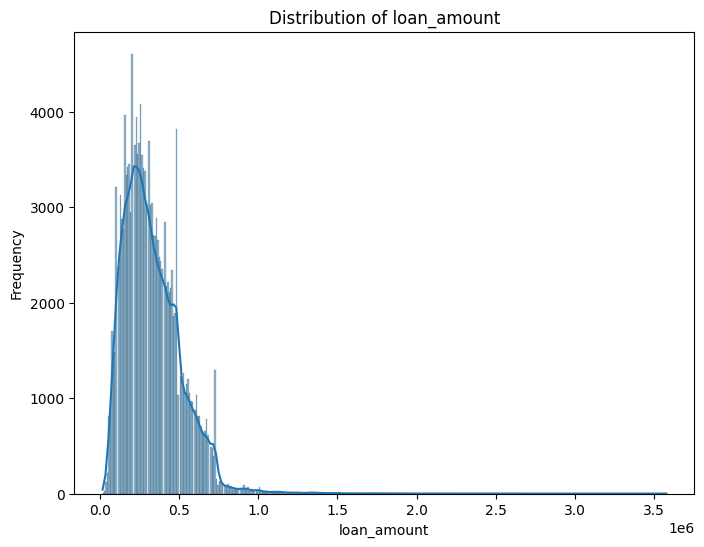

Univariate Analysis for: rate_of_interest
count    148670.000000
mean          4.051185
std           0.491826
min           0.000000
25%           3.750000
50%           3.990000
75%           4.250000
max           8.000000
Name: rate_of_interest, dtype: float64


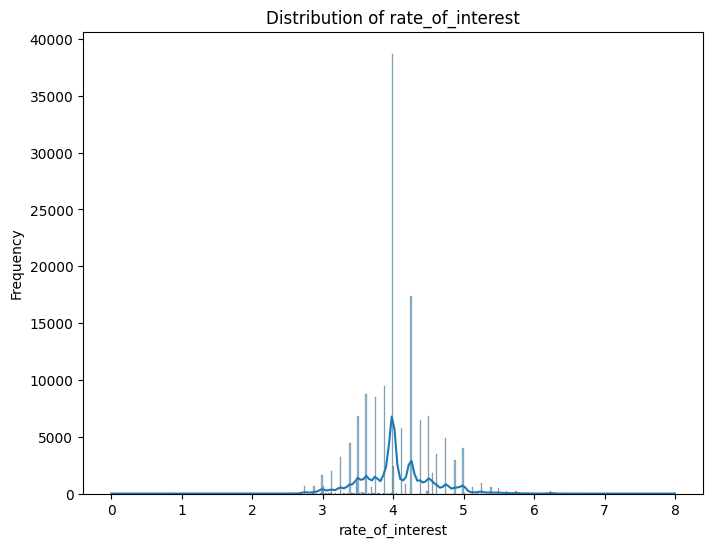

Univariate Analysis for: Upfront_charges
count    148670.000000
mean       3034.375182
std        2827.847564
min           0.000000
25%        1250.000000
50%        2826.250000
75%        3889.495000
max       60000.000000
Name: Upfront_charges, dtype: float64


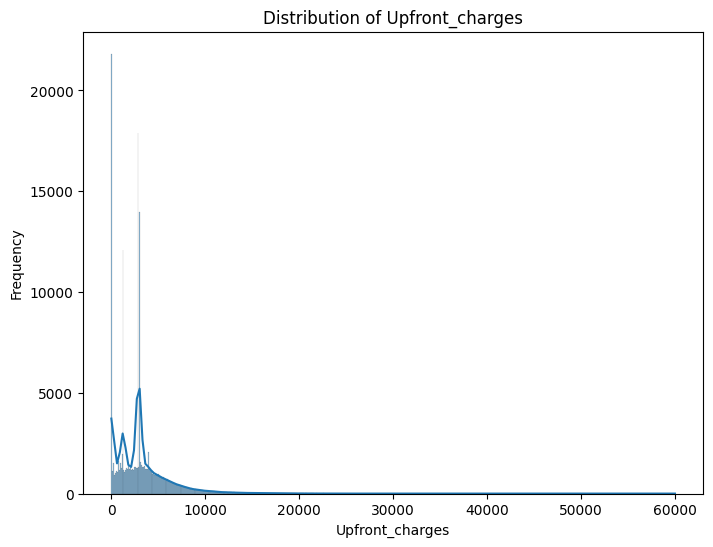

Univariate Analysis for: property_value
count    1.486700e+05
mean     4.922527e+05
std      3.506106e+05
min      8.000000e+03
25%      2.680000e+05
50%      4.080000e+05
75%      6.280000e+05
max      1.650800e+07
Name: property_value, dtype: float64


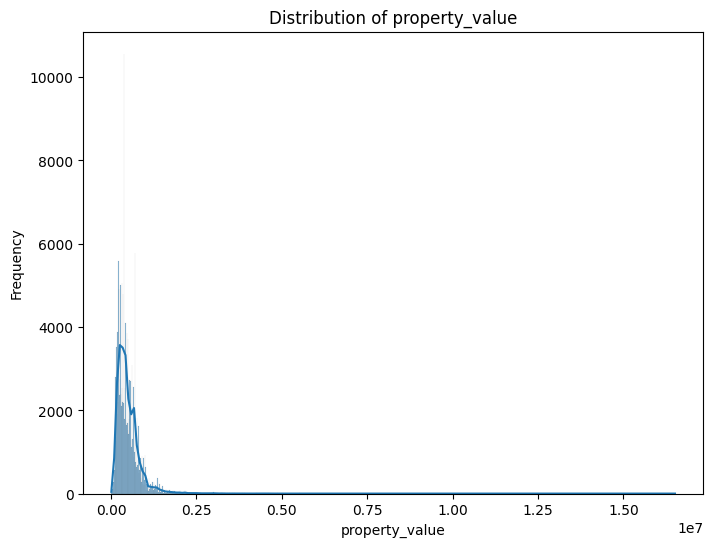

Univariate Analysis for: income
count    148670.000000
mean       6921.643304
std        6319.398736
min           0.000000
25%        3780.000000
50%        5640.000000
75%        8580.000000
max      578580.000000
Name: income, dtype: float64


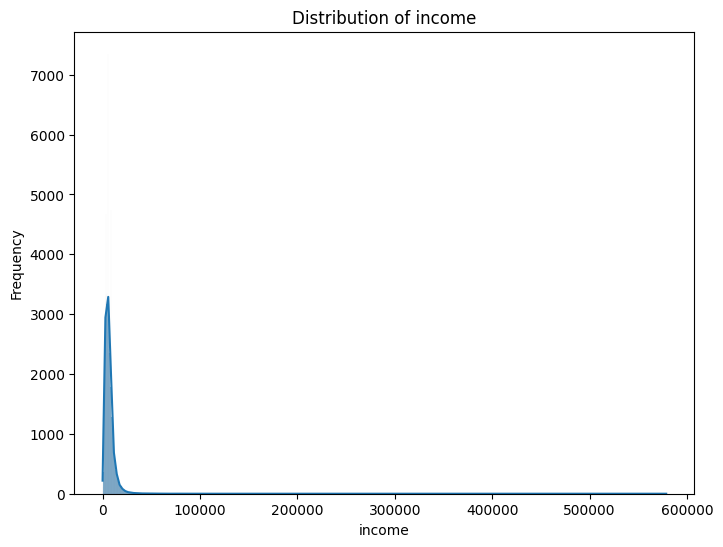

Univariate Analysis for: Credit_Score
count    148670.000000
mean        699.789103
std         115.875857
min         500.000000
25%         599.000000
50%         699.000000
75%         800.000000
max         900.000000
Name: Credit_Score, dtype: float64


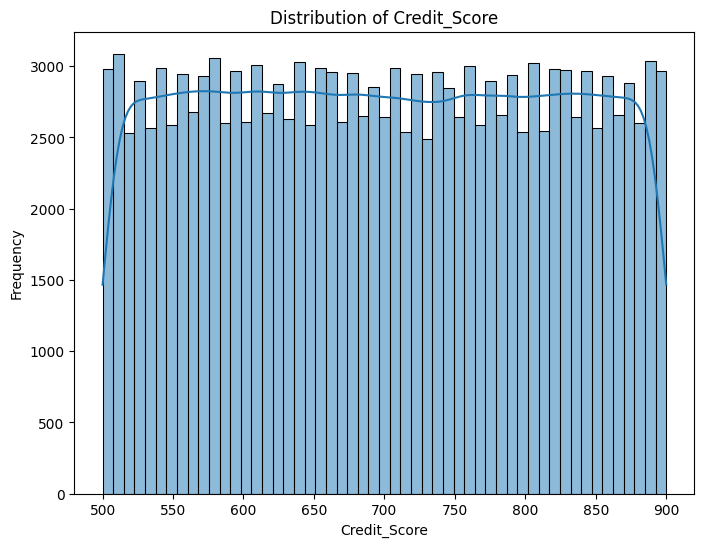

Univariate Analysis for: LTV
count    148670.000000
mean         72.807992
std          38.167522
min           0.970000
25%          60.820000
50%          75.060000
75%          85.960000
max        7831.250000
Name: LTV, dtype: float64


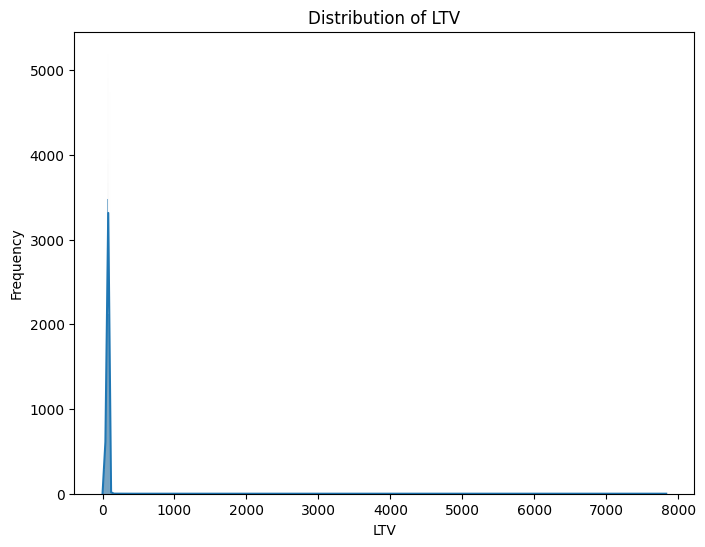

Univariate Analysis for: Income-to-Debt Ratio
count    148670.000000
mean          2.311444
std           1.904967
min           0.000000
25%           1.435467
50%           1.894737
75%           2.616647
max         166.873239
Name: Income-to-Debt Ratio, dtype: float64


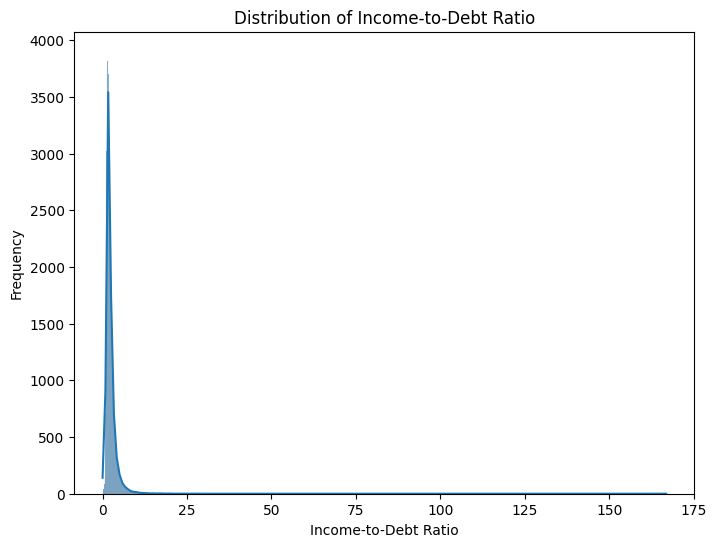

Univariate Analysis for: Loan_interest_cost
count    148670.000000
mean      13260.187304
std        7396.566711
min           0.000000
25%        7927.500000
50%       11830.350000
75%       17118.750000
max      138768.200000
Name: Loan_interest_cost, dtype: float64


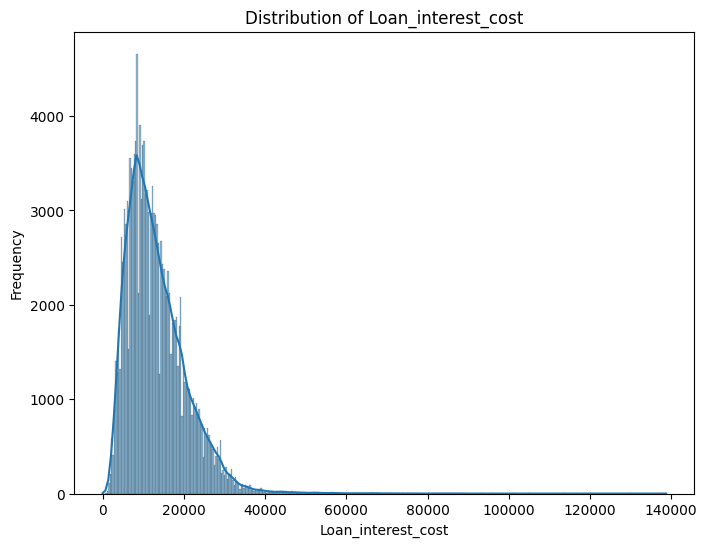

In [143]:
# Create a list of numerical columns
numerical_cols = ['loan_amount', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'Credit_Score', 'LTV', 'Income-to-Debt Ratio', 'Loan_interest_cost']
# Loop through each numerical column and create a univariate analysis
for col in numerical_cols:
  print(f"Univariate Analysis for: {col}")
  print(df[col].describe())  # Descriptive statistics
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()


**🔍OBSERVATION🔎**

- **Income to Debt ratio**
    - Borrowers with a very low ratio between 0 to 20 are more likely to default on the loan since they might struggle to meet their monthly payments.
    - A high ratio indicates that the borrower has much more income than debt. For example, a ratio of 100 or more means the borrower’s income is at least 100 times higher than their debt.
    - Borrowers with high ratios are considered low risk, as they have a strong ability to repay their loans. Lenders are likely to feel confident about lending to individuals with high income-to-debt ratios, as they are less likely to default.
- **LTV**
    -  Normally, LTV percentages fall between 0 and 100, sometimes slightly higher if dealing with specific lending cases (like loans exceeding the property value).
    - Extremely High-Risk Loans: If the LTV truly ranges high, it might indicate cases where the loan amount is substantially higher than the property value. Such scenarios are highly risky for lenders, as the collateral (property) value does not cover the loan in case of default.
    - Low LTV means the borrower has a large amount of equity in the property, there is less chance for default and the interest rate may be lesser.



### <font color=#00836c>**8.2) Detecting Outliers📈**</font>

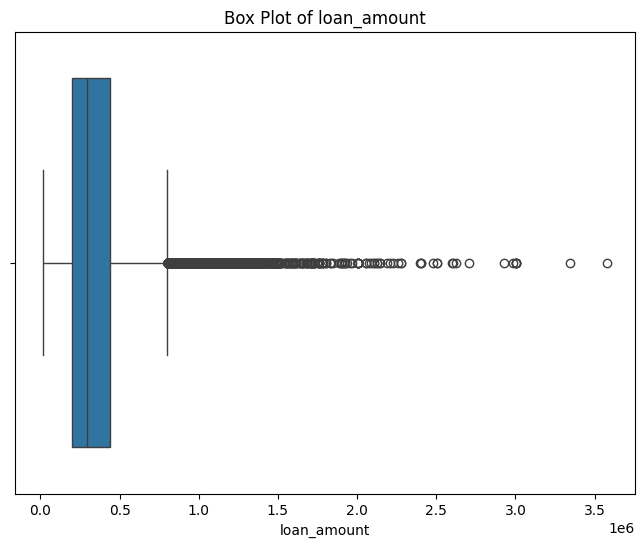

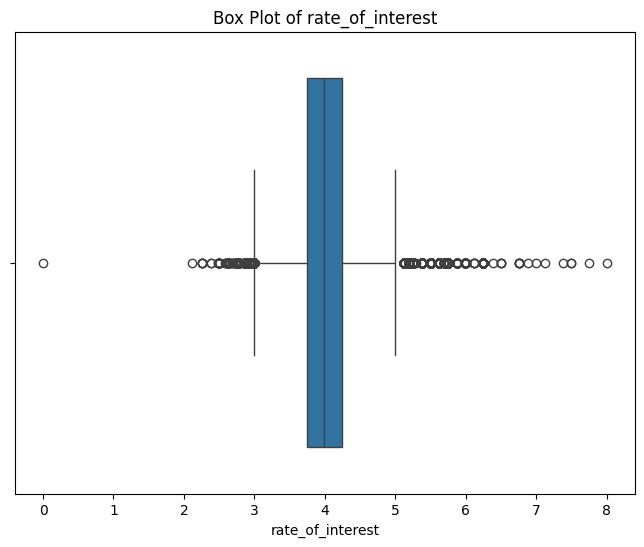

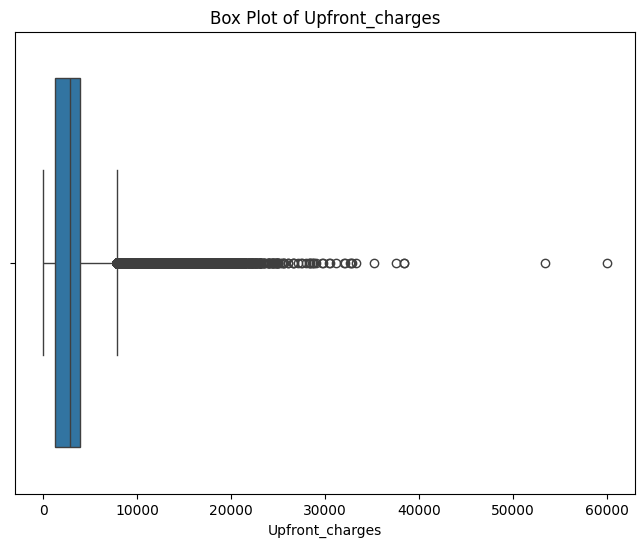

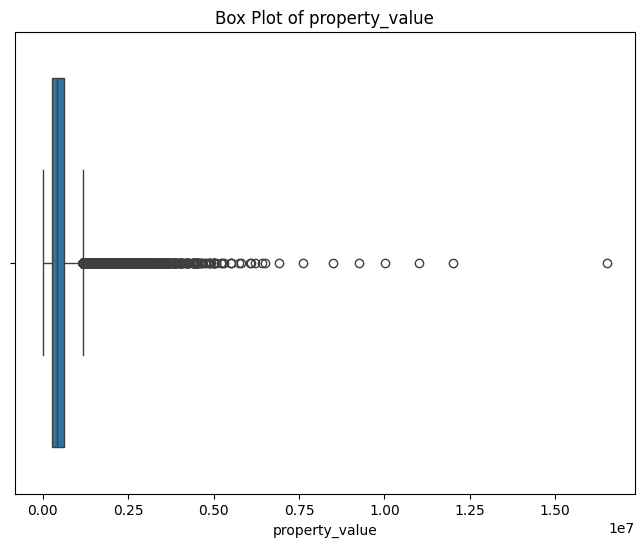

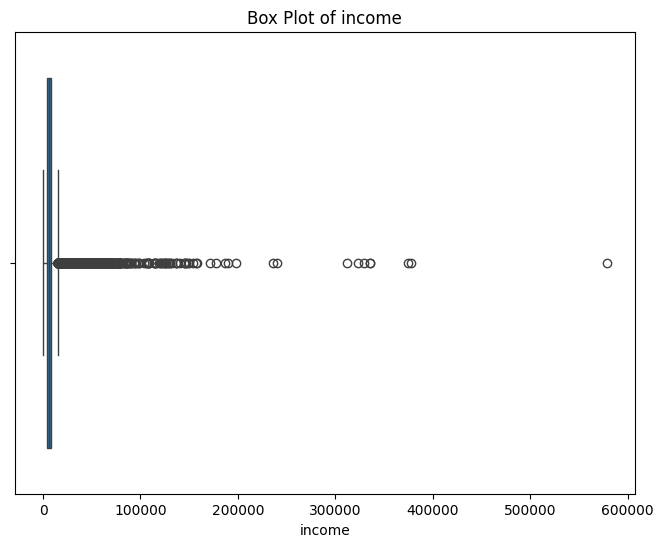

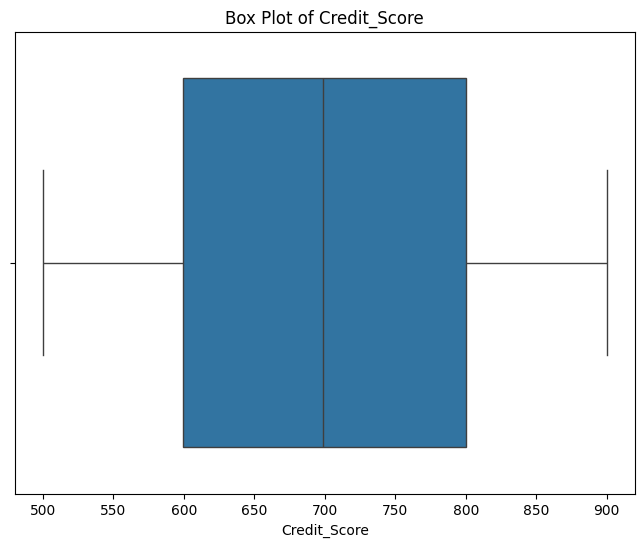

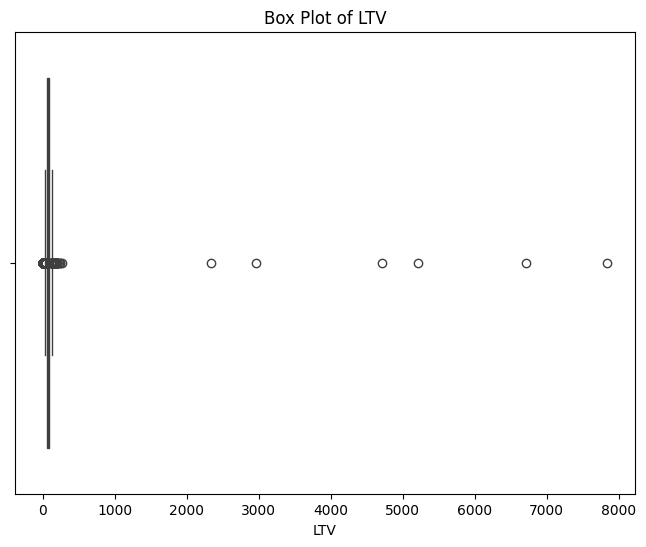

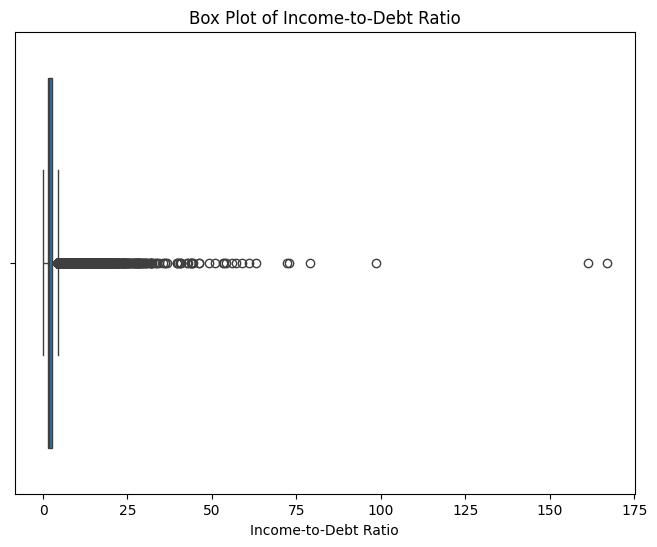

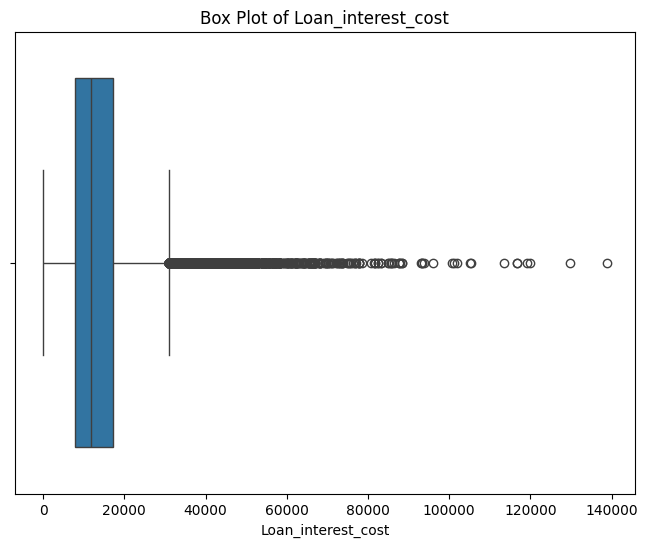

In [144]:
# Create box plots for numerical variables to detect outliers
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f"Box Plot of {col}")
  plt.show()

### <font color=#00836c>**Skewness📈**</font>

In [106]:
#Creating a numerical dataframe
numerical_df = df[['loan_amount', 'rate_of_interest', 'Upfront_charges','property_value', 'income', 'Credit_Score', 'LTV', 'Income-to-Debt Ratio', 'Loan_interest_cost','Status']]
print('Skewness Coefficient')
print('*'*20)
numerical_df.skew().round(2)

Skewness Coefficient
********************


,0
loan_amount,1.67
rate_of_interest,0.41
Upfront_charges,2.13
property_value,4.56
income,17.67
Credit_Score,0.00
LTV,124.43
Income-to-Debt Ratio,16.10
Loan_interest_cost,1.71
Status,1.18


**🔍OBSERVATION🔎**
- **loan_amount (1.67):**
    - Moderately positively skewed; most loan amounts are lower, with a few high amounts pulling the distribution right.

- **rate_of_interest (0.41):**
    - Low skewness; distribution is slightly positively skewed, almost symmetrical.

- **Upfront_charges (2.13):**
    - Highly positively skewed; most loans have lower upfront charges, with a few high ones creating a long right tail.

- **property_value (4.56):**
    - Significantly positively skewed; most properties have lower values, with a few high-value properties stretching the distribution right.

- **income (17.67):**
    - Very high positive skewness; most incomes are concentrated at the lower end, with a few extremely high incomes skewing the distribution heavily.

- **Credit_Score (0.00):**
    - Perfectly symmetrical distribution with a skewness of 0.

- **LTV (124.43):**
    - Extremely high positive skewness; most loans have low LTV ratios, with a few loans having very high ratios, pulling the distribution right.

- **Income-to-Debt Ratio (16.10):**
    - Very high skewness; most borrowers have low income-to-debt ratios, but there are outliers with much higher ratios.

- **Loan_interest_cost (1.71):**
    - Moderately positively skewed; most loans have lower interest costs, but a few have high interest costs.

- **Status (1.18):**
    - Moderately positively skewed; most statuses (like loan statuses) are concentrated in one category, with some cases pulling the distribution right.

### <font color=#00836c>**8.3) Bivariate Analysis📉💹**</font>

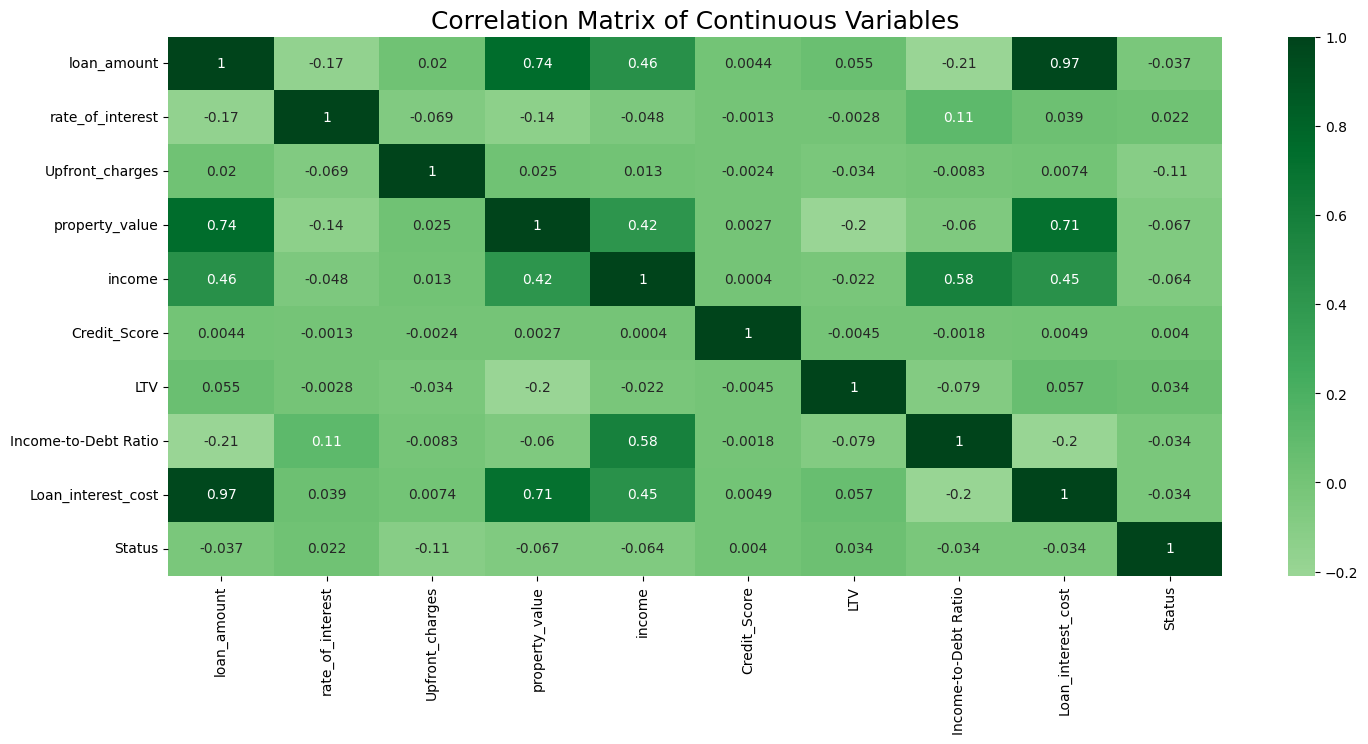

In [107]:
# Correlation Matrix of Continuous Variables
plt.figure(figsize=(17, 7))
sns.heatmap(numerical_df.corr(), annot=True, cmap='Greens',center=0)
plt.title('Correlation Matrix of Continuous Variables', fontsize = 18)
plt.show()

**🔍OBSERVATION🔎**
- There is no negative corelations.
- **High Correlations with Loan amount:**
    - Loan interest cost, property value, income has high corelation with loan amount,indicating that interest to be paid increases with increase in loan amount.
- **LTV:**
    - LTV has no corelations with other features
- **Property Value:**    
    - Property value has strong corelation with Loan amount and loan interest cost.
    - It has a slightly negative corelation with LTV
    - moderately positive corelation with income
- **Income:**
    - Income has a strong corelation with income to Debt ratio and Loan interest cost.


### <font color=#00836c>**8.4) Categorical vs. Numerical📉💹**</font>

#### <font color=#fa7f22>**1.  Examining the impact of variables such as loan type, loan purpose, business or commercial nature, and credit score on loan defaults**</font>

Percentage of Impact: loan_limit vs. Status
loan_limit  Status
cf          0         75.971938
            1         24.028062
ncf         0         66.786931
            1         33.213069
Name: proportion, dtype: float64


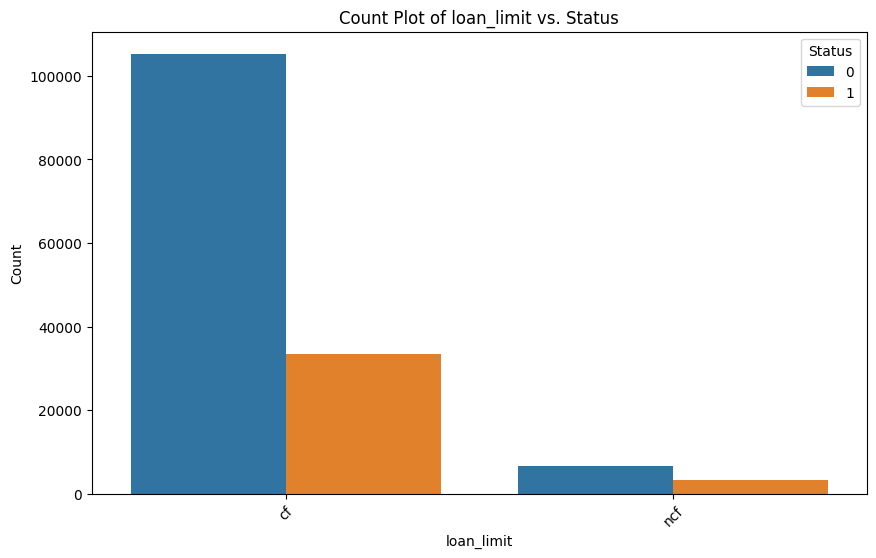

Percentage of Impact: loan_type vs. Status
loan_type  Status
type1      0         77.225133
           1         22.774867
type2      0         65.456122
           1         34.543878
type3      0         74.944011
           1         25.055989
Name: proportion, dtype: float64


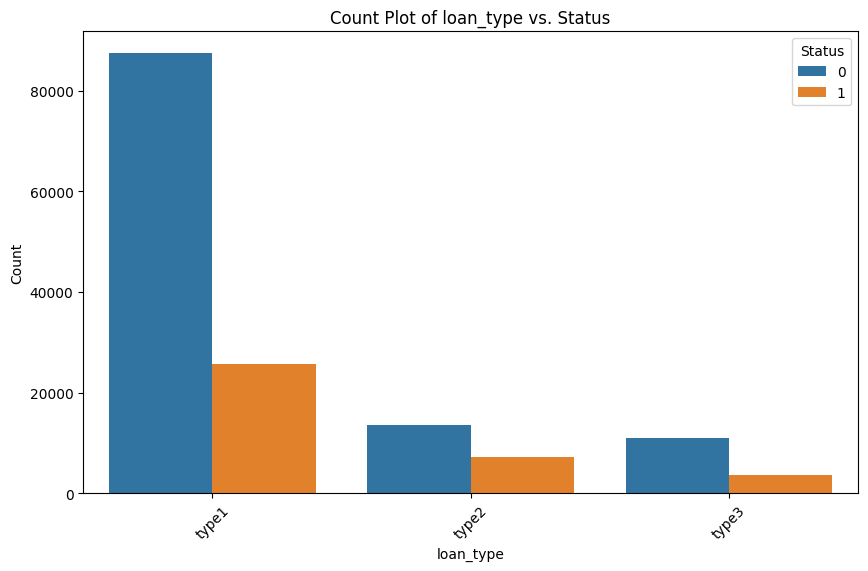

Percentage of Impact: loan_purpose vs. Status
loan_purpose  Status
p1            0         74.134090
              1         25.865910
p2            0         66.920964
              1         33.079036
p3            0         74.975889
              1         25.024111
p4            0         77.016629
              1         22.983371
Name: proportion, dtype: float64


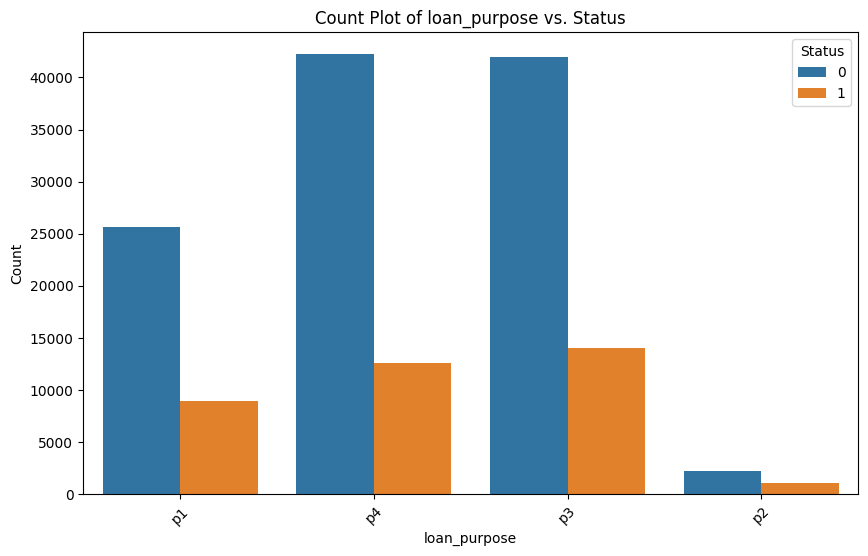

Percentage of Impact: business_or_commercial vs. Status
business_or_commercial  Status
b/c                     0         65.456122
                        1         34.543878
nob/c                   0         76.962348
                        1         23.037652
Name: proportion, dtype: float64


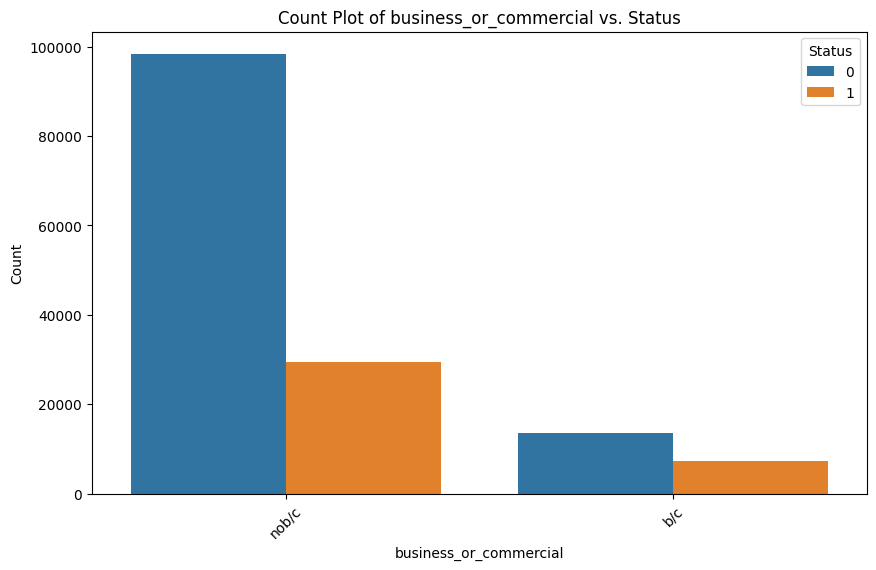

Percentage of Impact: Credit_Score_rating vs. Status
Credit_Score_rating  Status
Poor                 0         71.708683
                     1         28.291317
Fair                 0         75.417462
                     1         24.582538
Good                 0         75.498698
                     1         24.501302
Great                0         75.740756
                     1         24.259244
Excellent            0         74.803362
                     1         25.196638
Name: proportion, dtype: float64


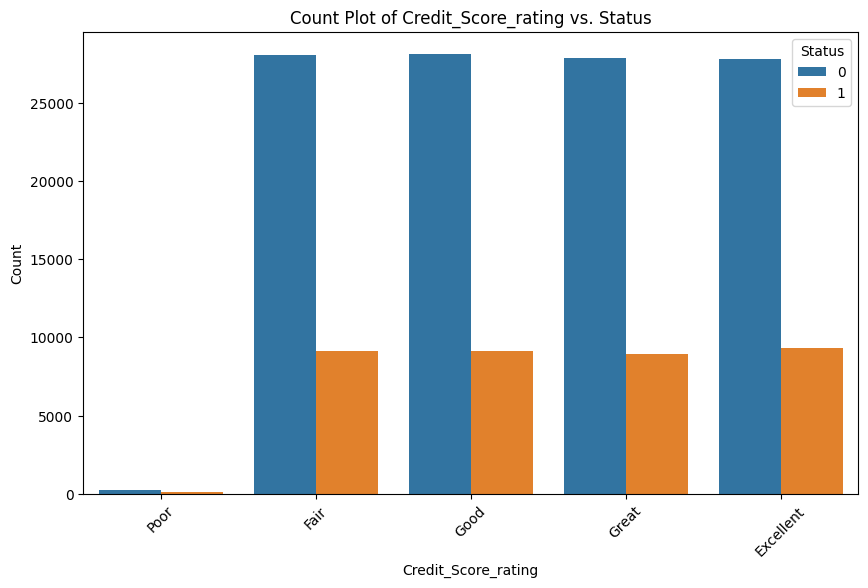

Percentage of Impact: Gender vs. Status
Gender             Status
Female             0         74.884472
                   1         25.115528
Joint              0         80.837701
                   1         19.162299
Male               0         73.808624
                   1         26.191376
Sex Not Available  0         71.409225
                   1         28.590775
Name: proportion, dtype: float64


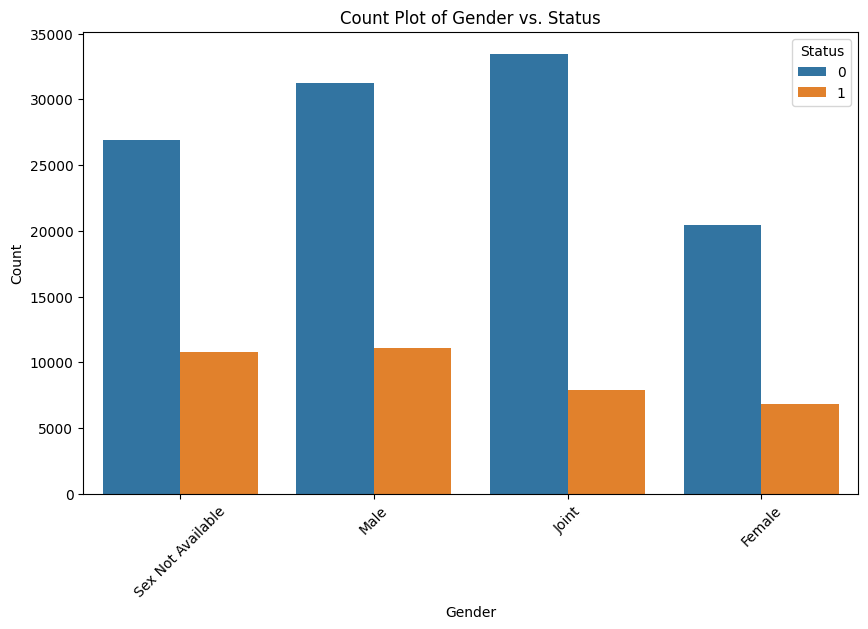

Percentage of Impact: age vs. Status
age    Status
25-34  0         77.807962
       1         22.192038
35-44  0         77.511395
       1         22.488605
45-54  0         75.872486
       1         24.127514
55-64  0         73.951848
       1         26.048152
65-74  0         73.144042
       1         26.855958
<25    0         71.054600
       1         28.945400
>74    0         69.993031
       1         30.006969
Name: proportion, dtype: float64


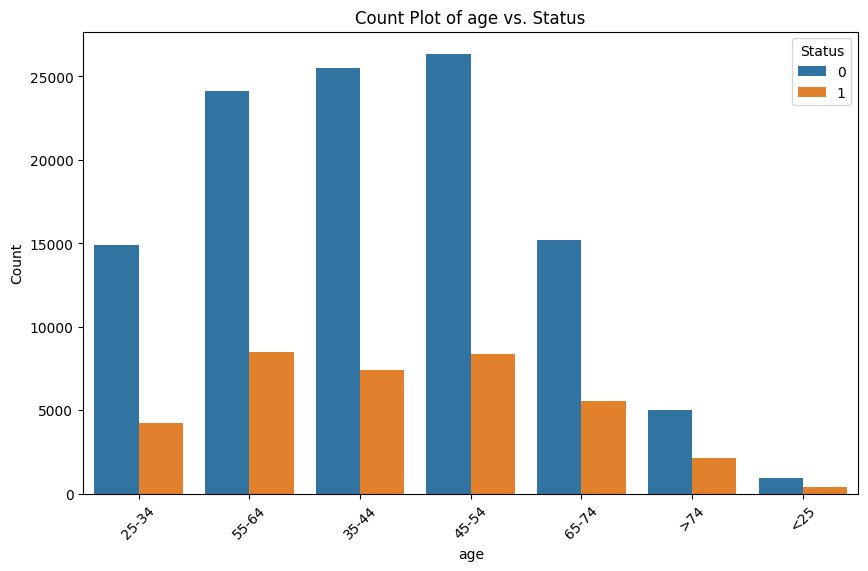

In [145]:
categorical_cols = ['loan_limit', 'loan_type', 'loan_purpose', 'business_or_commercial', 'Credit_Score_rating','Gender','age']
numerical_col = 'Status'

for col in categorical_cols:
  print(f"Percentage of Impact: {col} vs. Status")
  print(df.groupby(col)['Status'].value_counts(normalize=True)*100)  # Percentage distribution
  plt.figure(figsize=(10, 6))
  sns.countplot(x=col, hue=numerical_col, data=df)
  plt.title(f"Count Plot of {col} vs. Status")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.legend(title='Status')
  plt.xticks(rotation=45)
  plt.show()

**🔍OBSERVATION🔎**

- **Loan Limit**
- **Age between 25-44 has the least rate of defaults**
- **Sex not available and Male has more defaults whereas joint accounts has the least defaulters**
- **Credit score of 500 has the most defaulters**
- **Business or commercial loans has more defaulters compared to non commercial loans**
- **When we look at the loan purpose, P1 has the most defaulters percentage followed by P1**
- **Loan Type 2 has the most defaulters followed by Type 1**
- **Variable Loan limit has the most defaulters**



In [127]:
print(df.groupby(['loan_type','business_or_commercial'])['Status'].value_counts(normalize=True)*100)

loan_type  business_or_commercial  Status
type1      nob/c                   0         77.225133
                                   1         22.774867
type2      b/c                     0         65.456122
                                   1         34.543878
type3      nob/c                   0         74.944011
                                   1         25.055989
Name: proportion, dtype: float64


**🔍OBSERVATION🔎**

- Type 2 loans are all for Business or Commercial purpose, which has highest defaulters.
- Type 1 and Type 3 loan is for Non Commercial purpose, in that Type 3 has more defaulters.

In [128]:
print(df.groupby(['loan_type','business_or_commercial','loan_purpose','loan_limit'])['Status'].value_counts(normalize=True)*100)

loan_type  business_or_commercial  loan_purpose  loan_limit  Status
type1      nob/c                   p1            cf          0          76.275320
                                                             1          23.724680
                                                 ncf         0          68.117978
                                                             1          31.882022
                                   p2            cf          0          69.902549
                                                             1          30.097451
                                                 ncf         0          58.385093
                                                             1          41.614907
                                   p3            cf          0          78.373103
                                                             1          21.626897
                                                 ncf         0          67.868988
                              

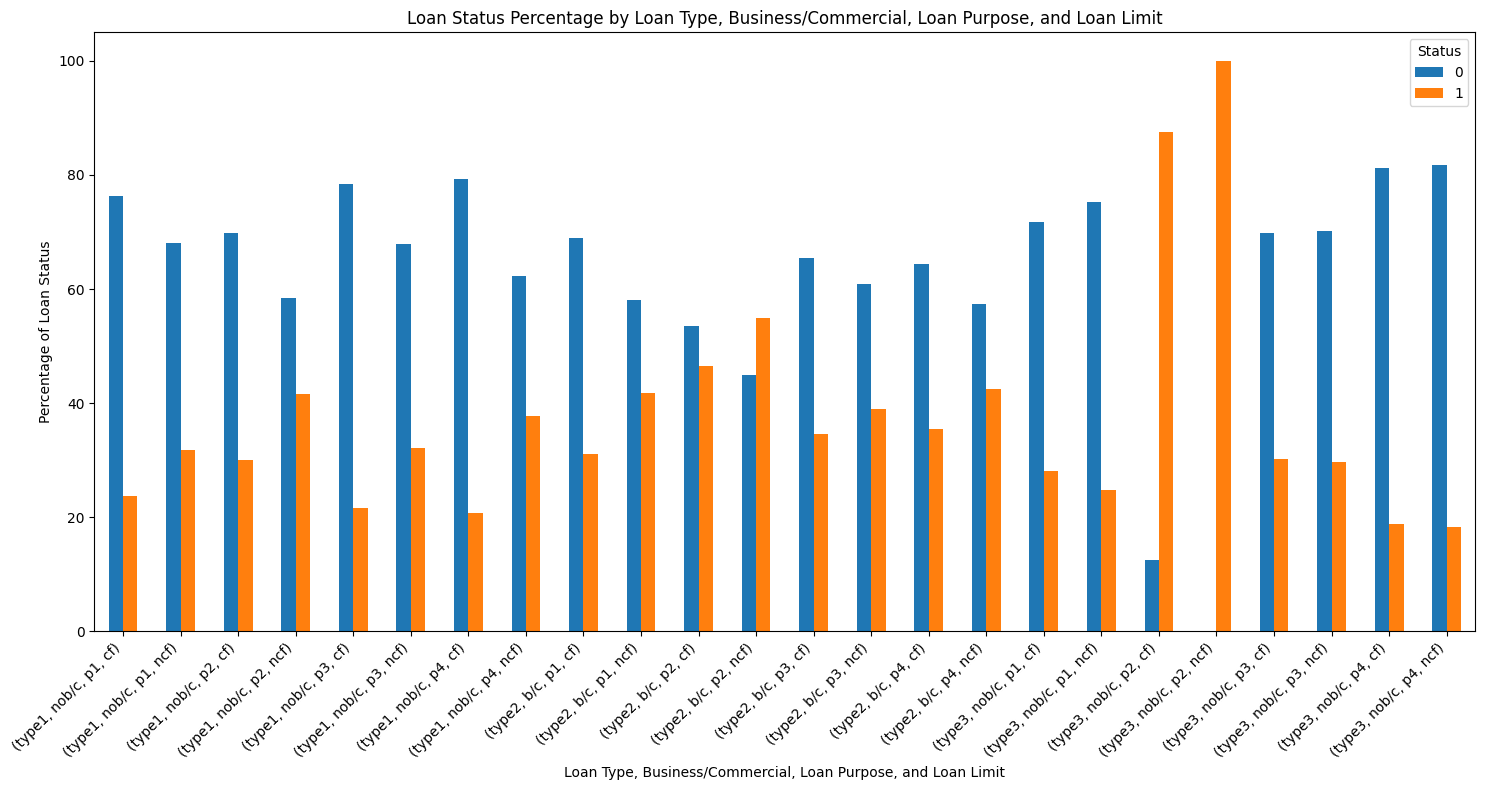

In [129]:
loan_status_percentage = df.groupby(['loan_type','business_or_commercial','loan_purpose','loan_limit'])['Status'].value_counts(normalize=True)*100

# Reshape the data for visualization
loan_status_percentage = loan_status_percentage.unstack()

# Create a visualization (e.g., a bar plot)
loan_status_percentage.plot(kind='bar', figsize=(15, 8))
plt.title('Loan Status Percentage by Loan Type, Business/Commercial, Loan Purpose, and Loan Limit')
plt.xlabel('Loan Type, Business/Commercial, Loan Purpose, and Loan Limit')
plt.ylabel('Percentage of Loan Status')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()



We can observe that
(type2, b/c, p1, ncf)
(type3, nob/c, p2, cf)
(type1, nob/c, p4, ncf)
(type2, b/c, p4, ncf)
(type3, b/c, p2, cf)

these combinations has the most defaulters percentage.

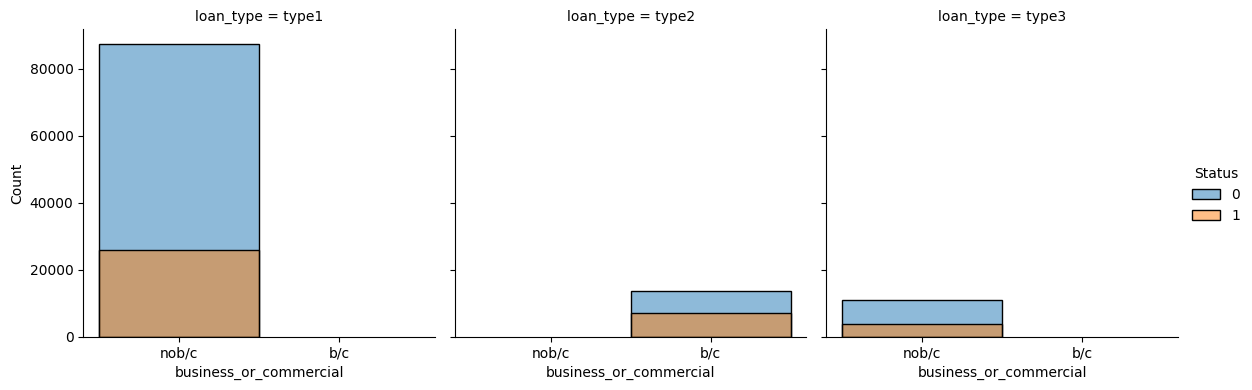

In [130]:
g = sns.FacetGrid(df, col='loan_type', hue='Status', height=4)
g.map(sns.histplot, 'business_or_commercial', kde=True)
g.add_legend()
plt.show()

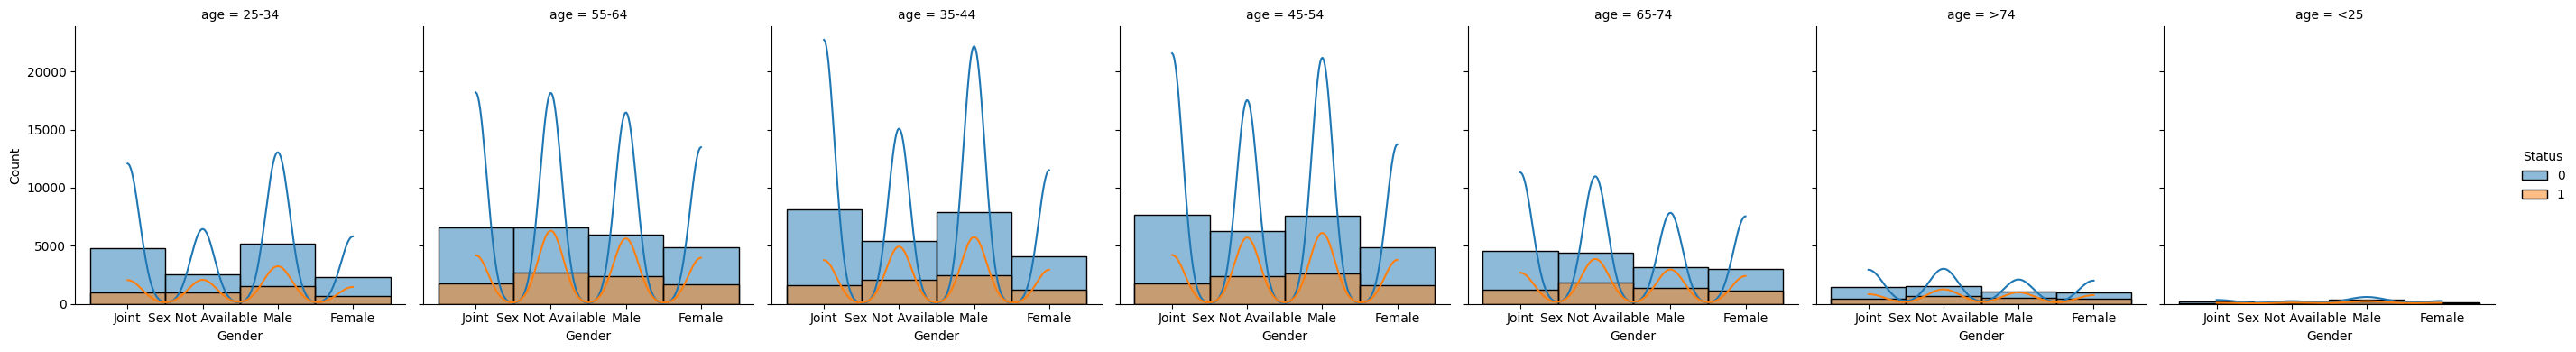

In [131]:
g = sns.FacetGrid(df, col='age', hue='Status', height=4)
g.map(sns.histplot, 'Gender', kde=True)
g.add_legend()
plt.show()

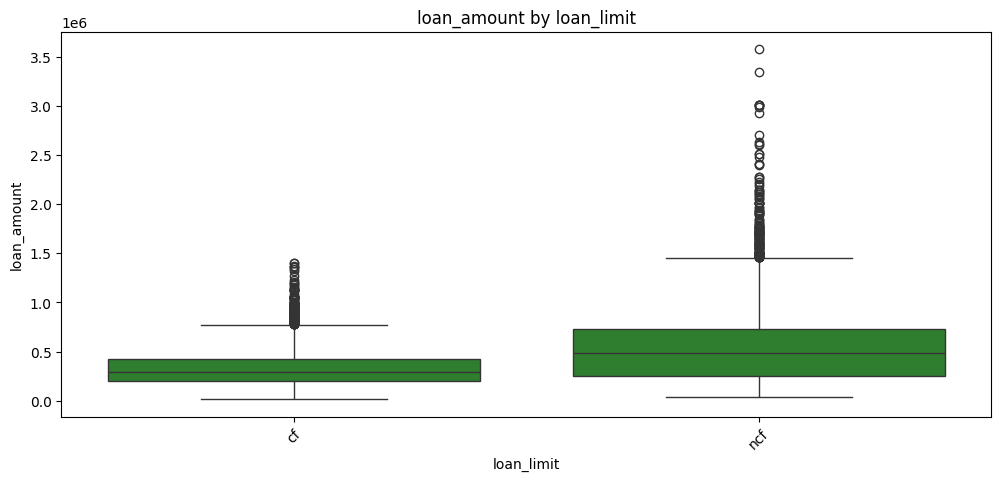

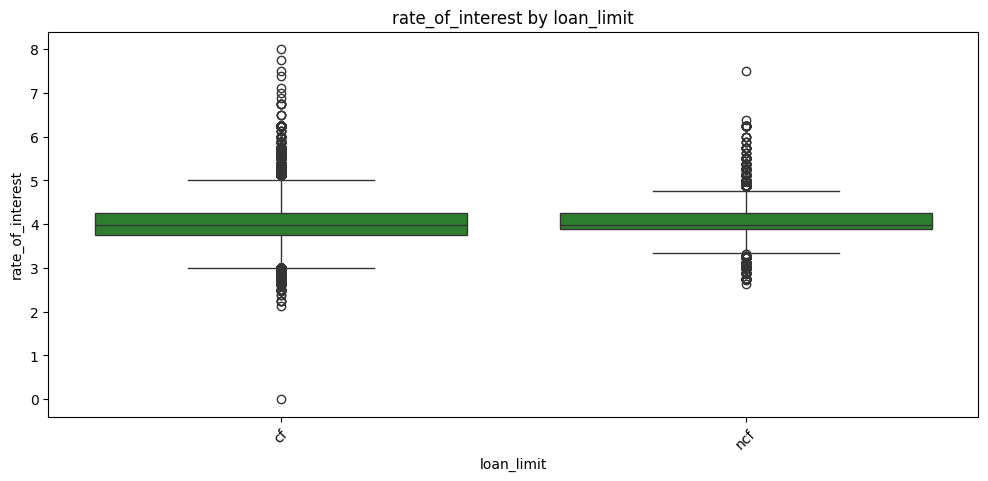

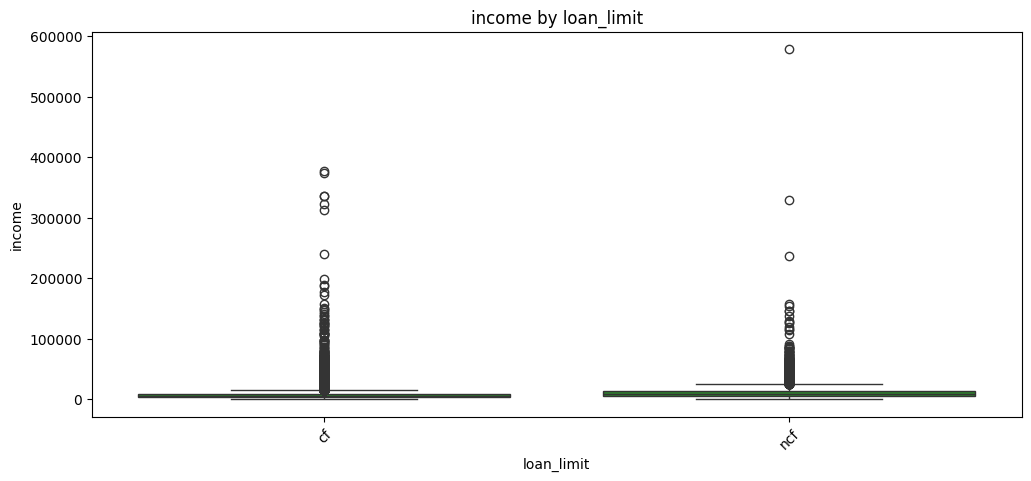

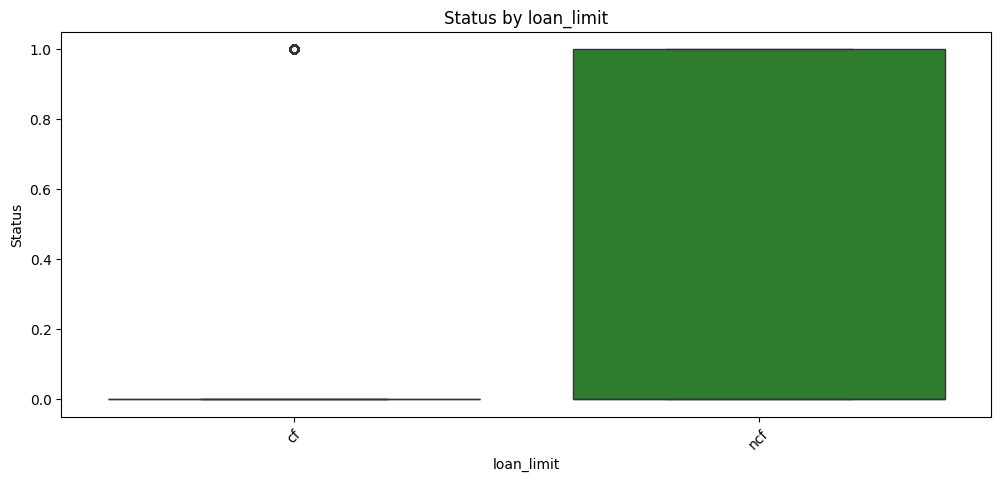

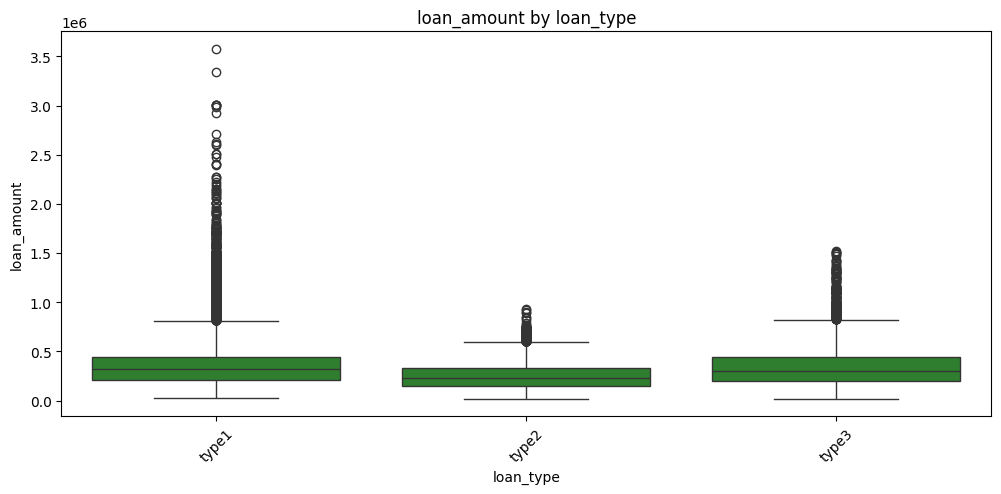

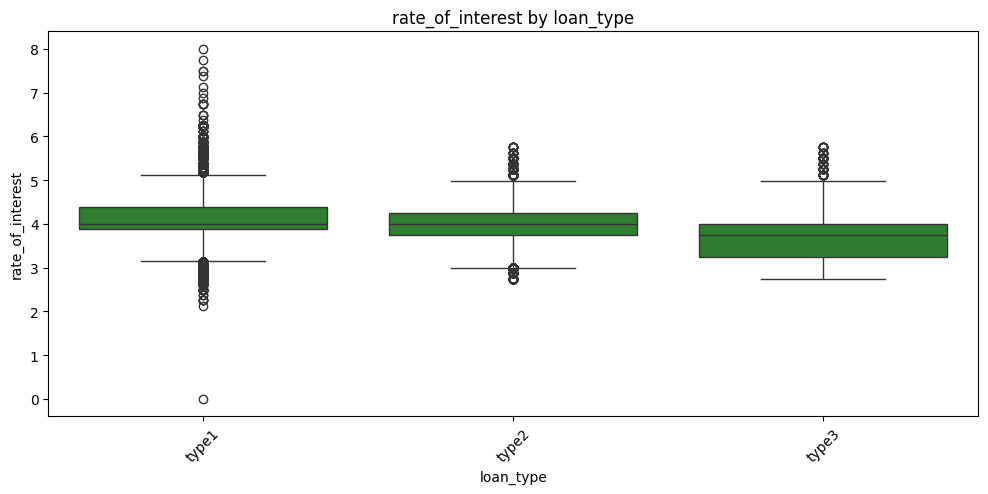

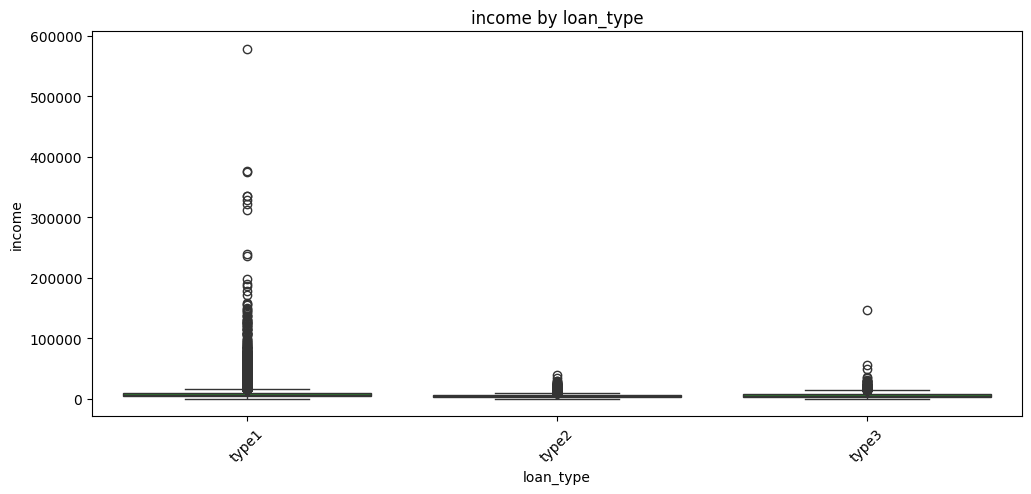

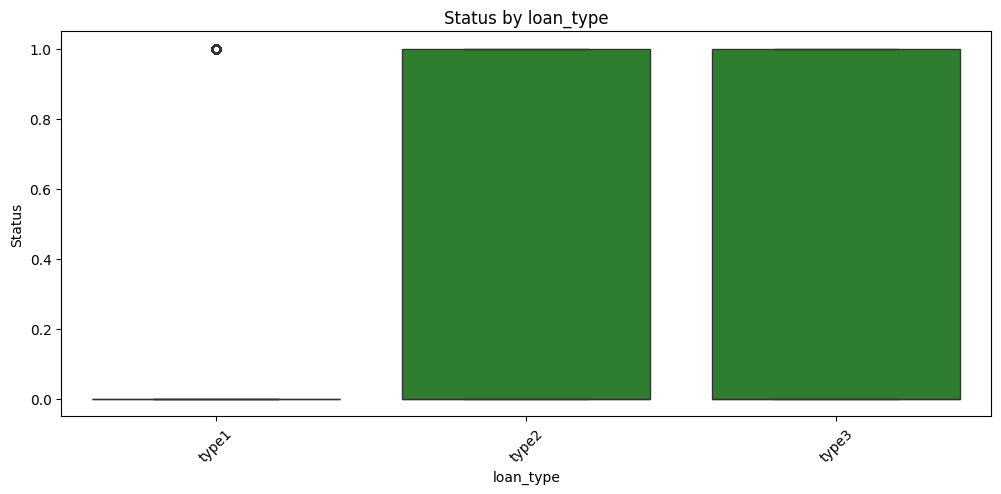

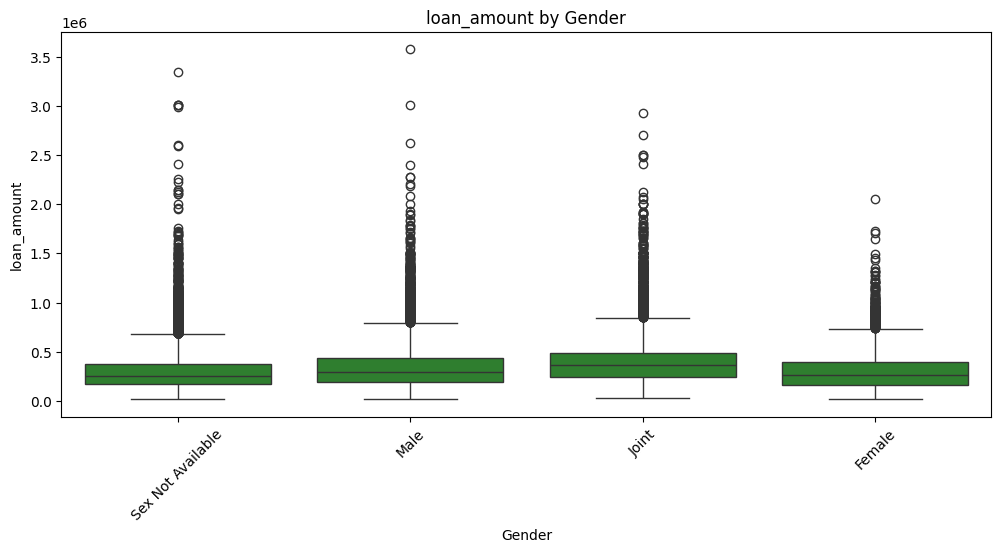

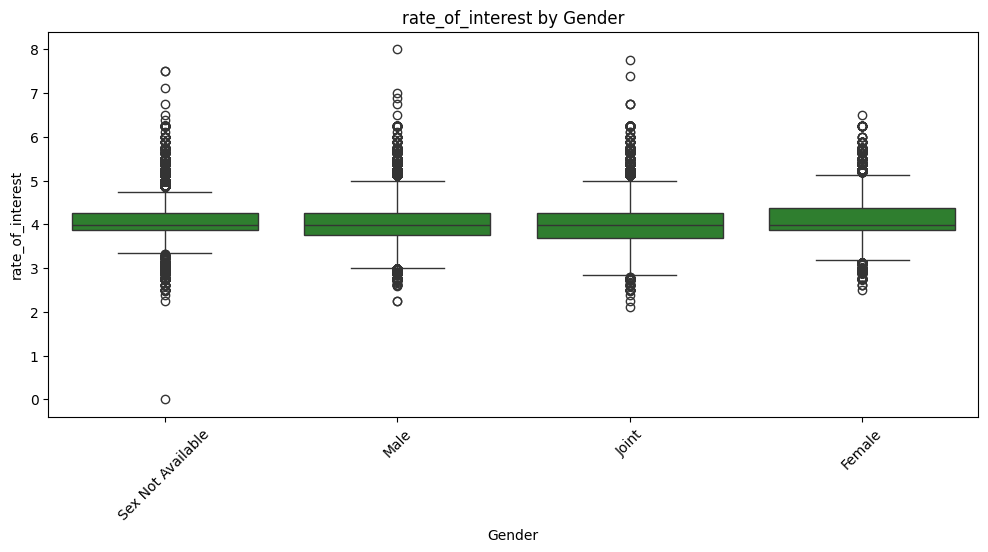

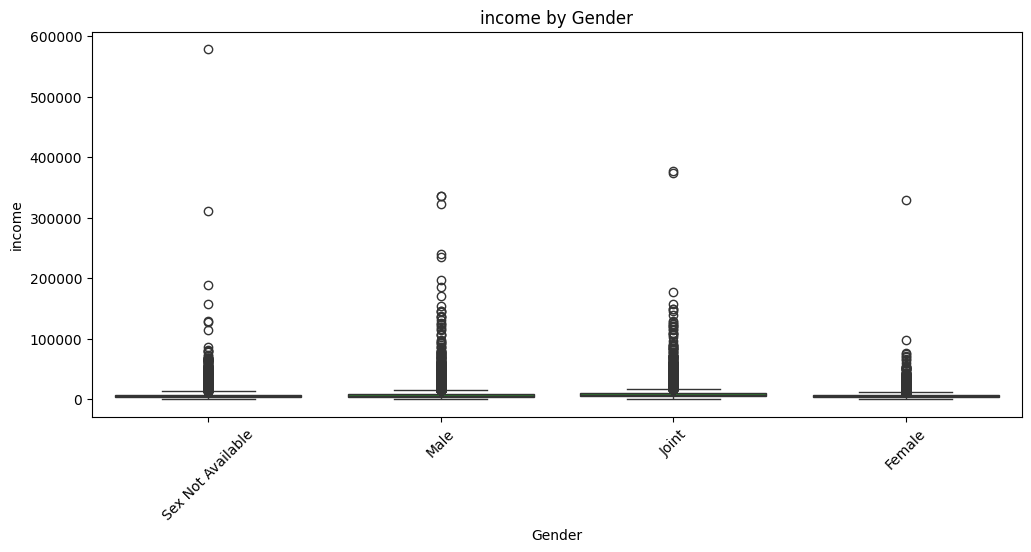

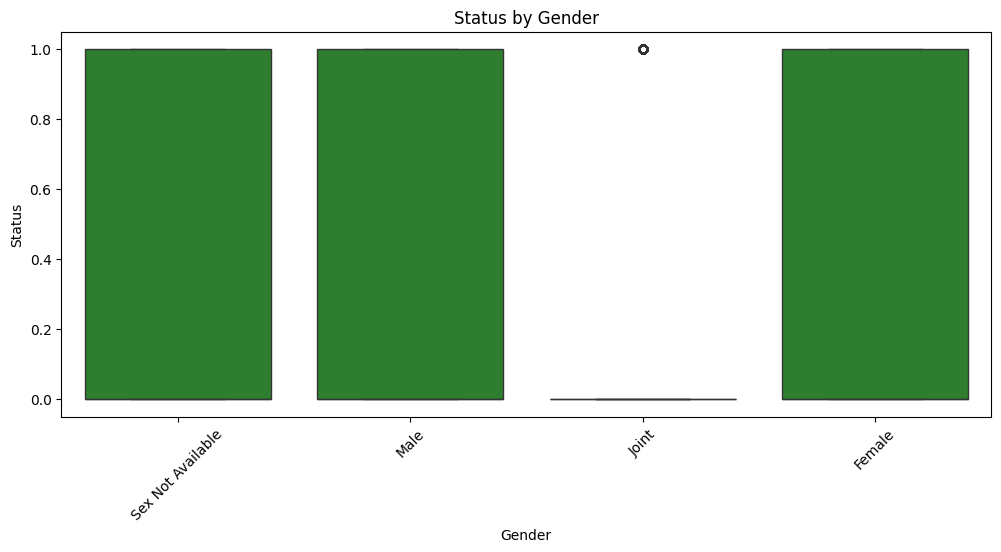

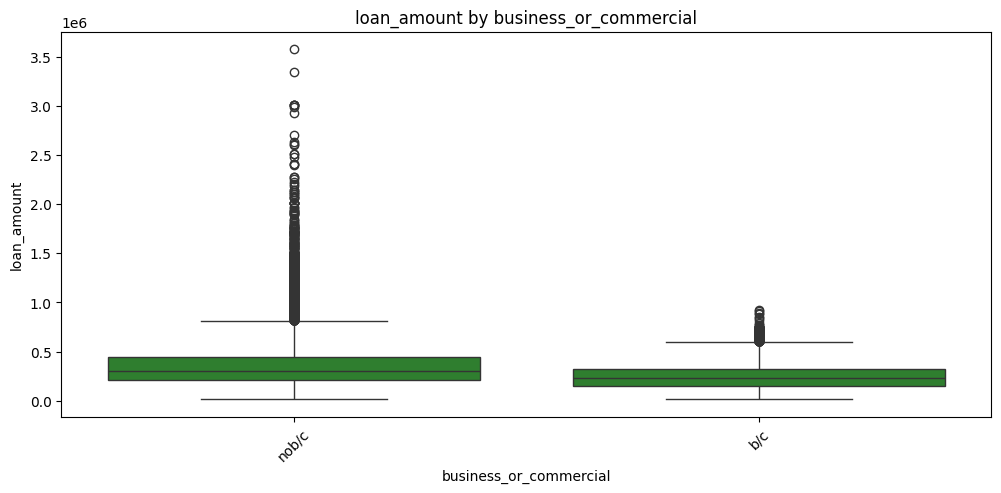

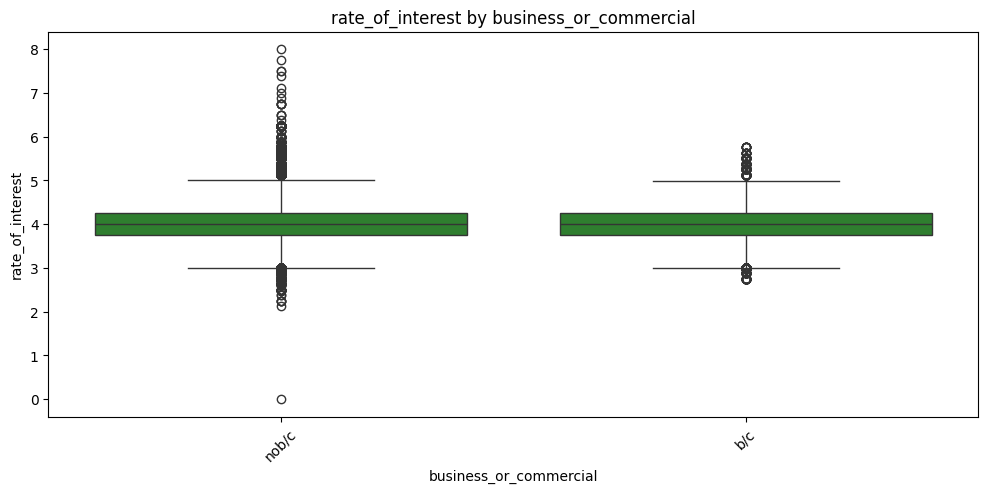

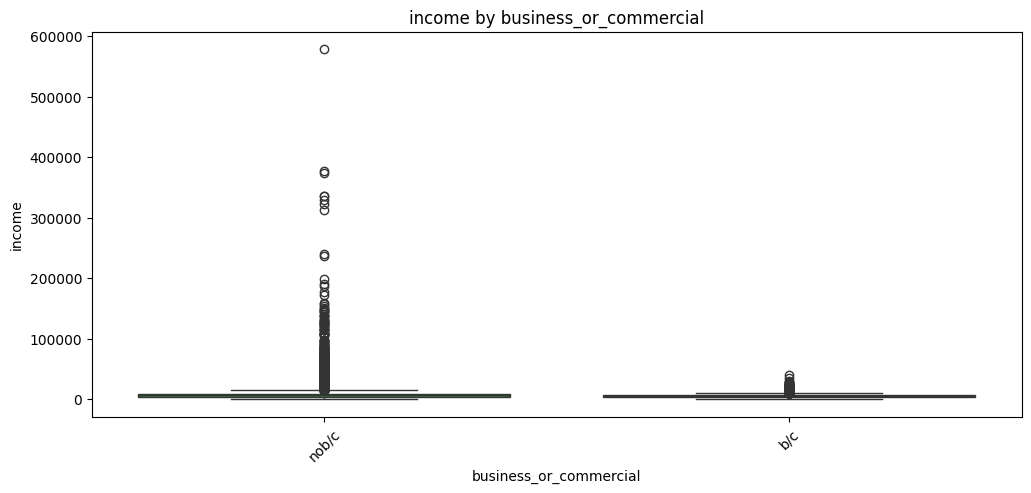

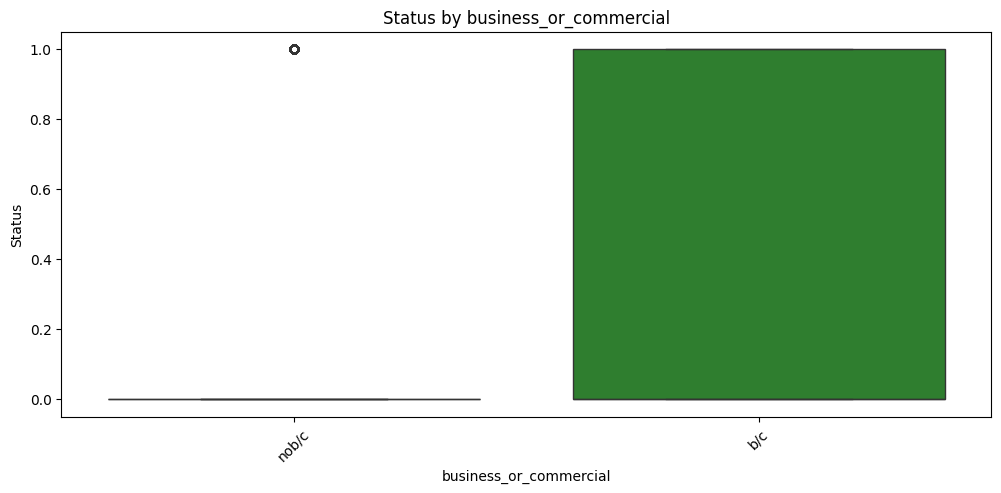

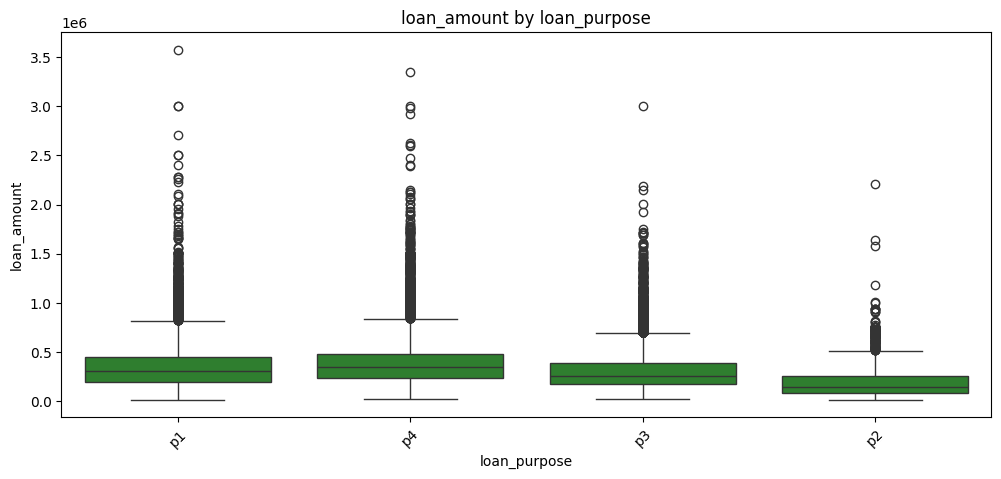

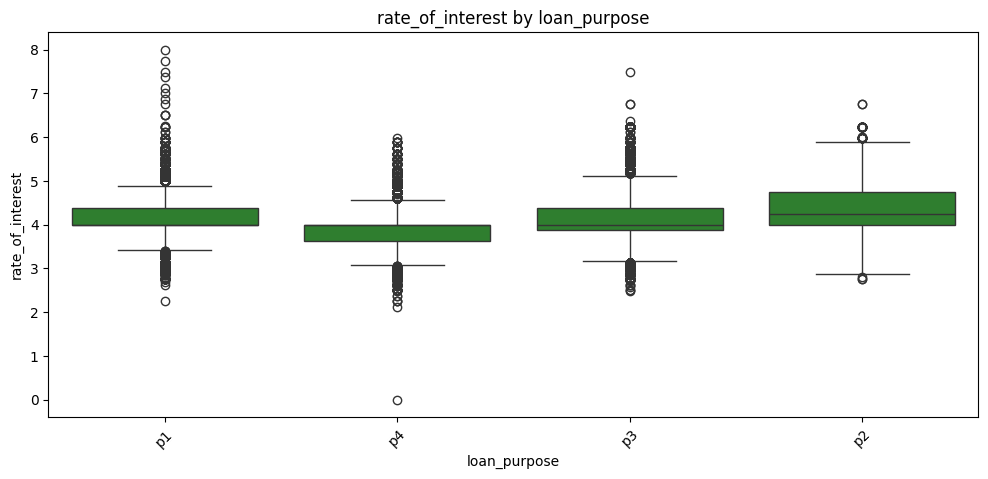

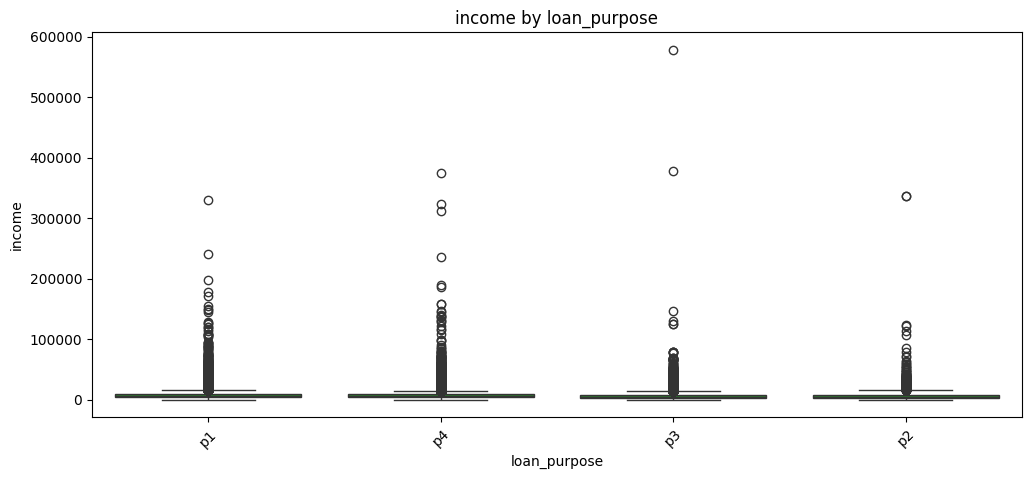

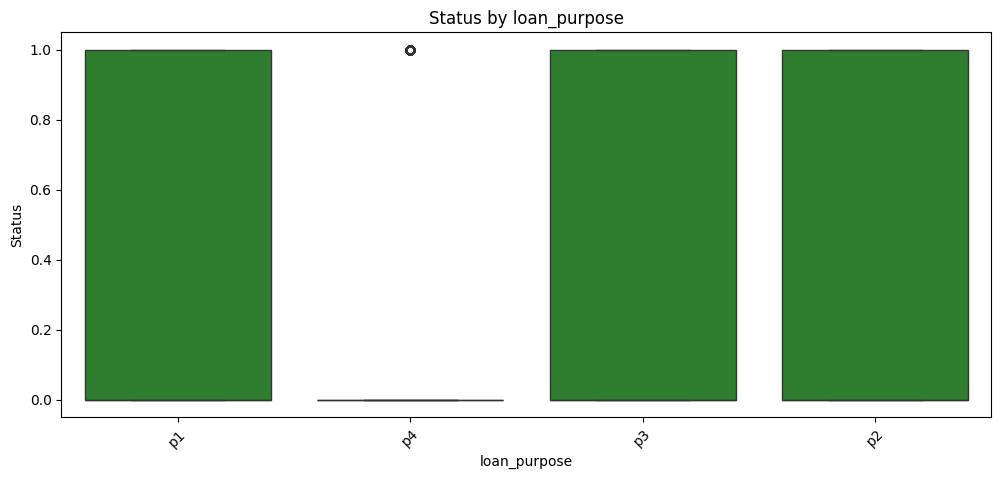

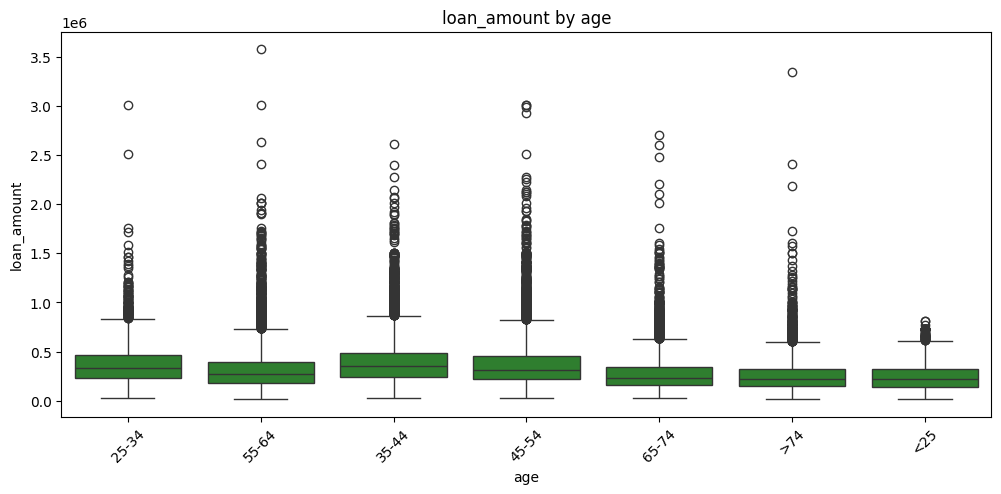

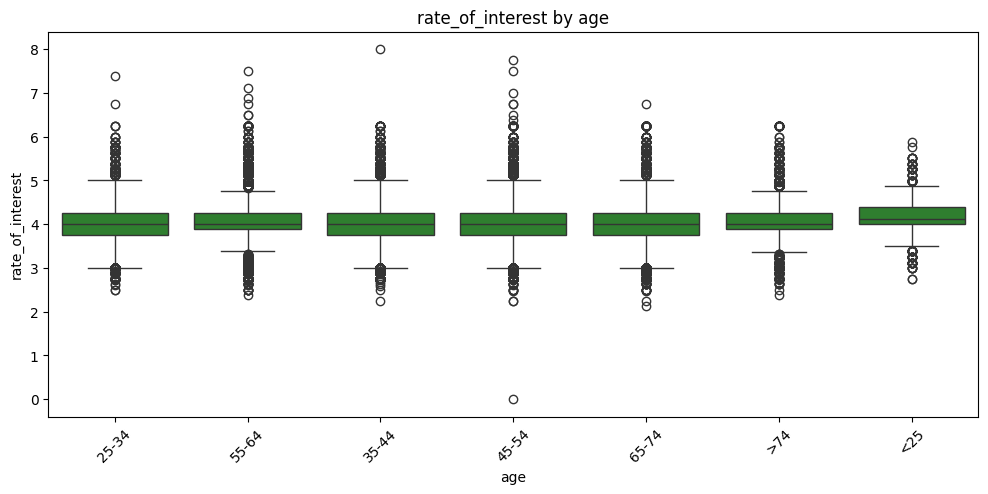

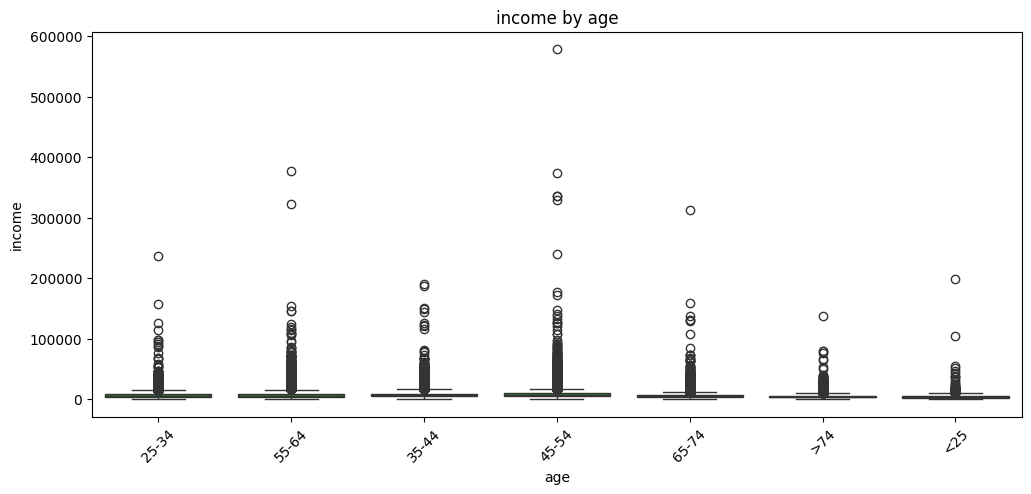

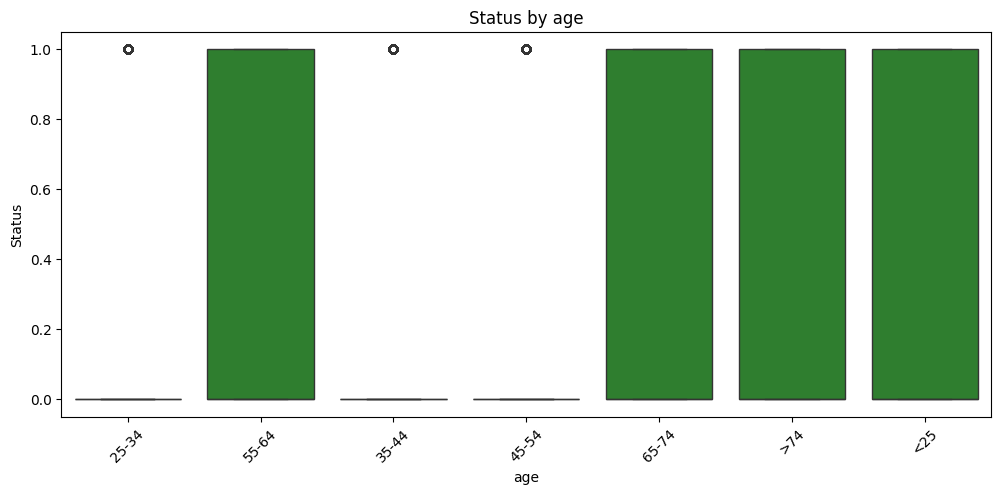

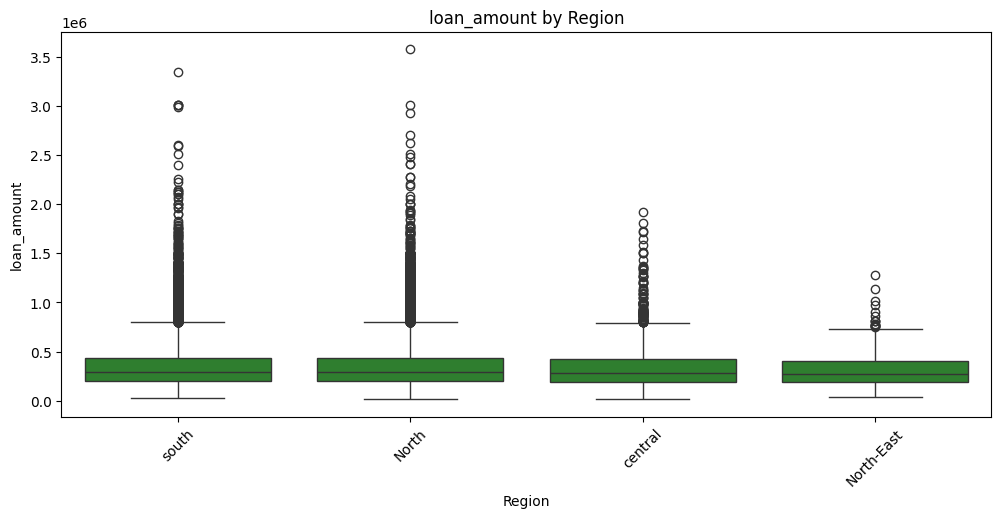

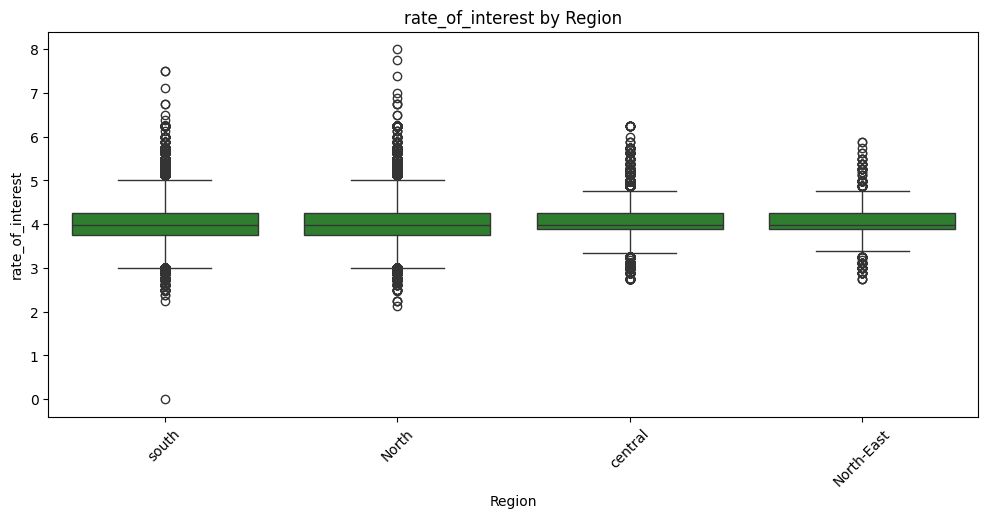

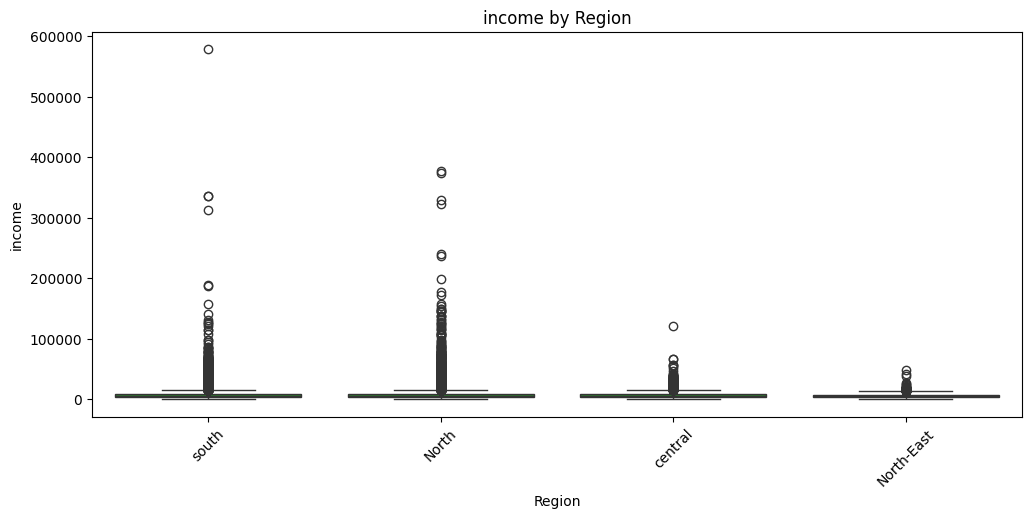

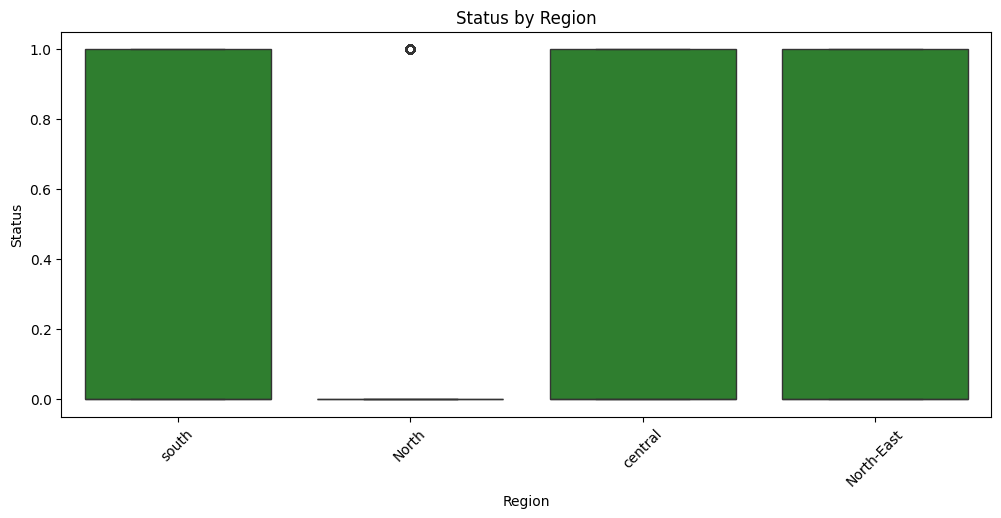

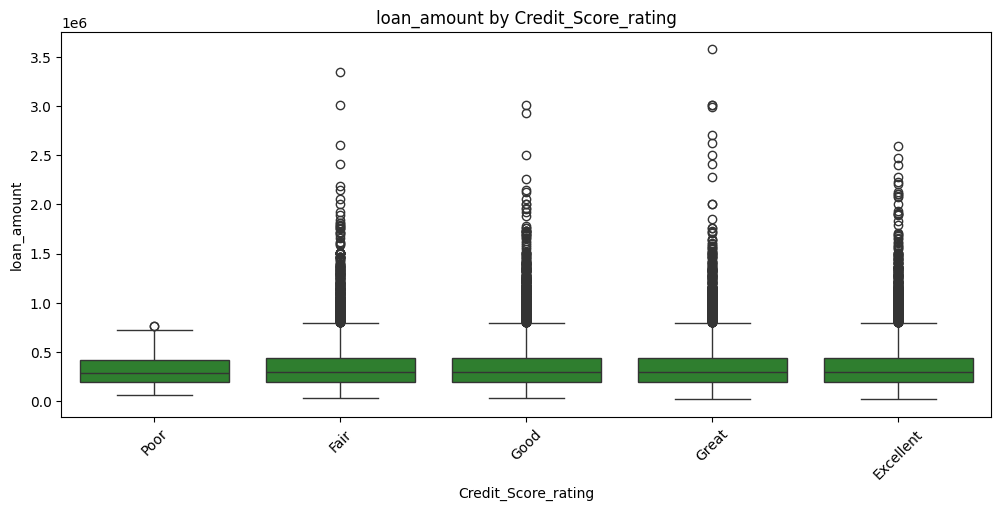

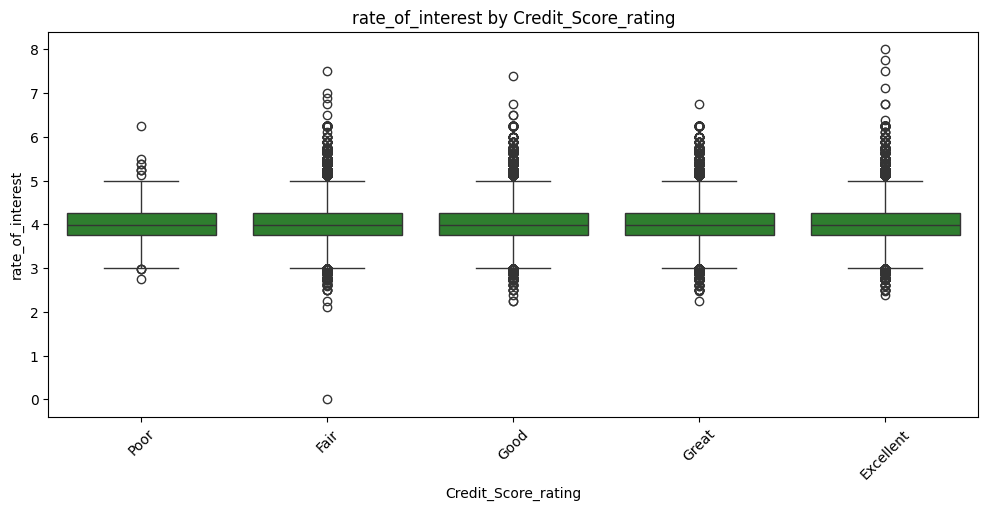

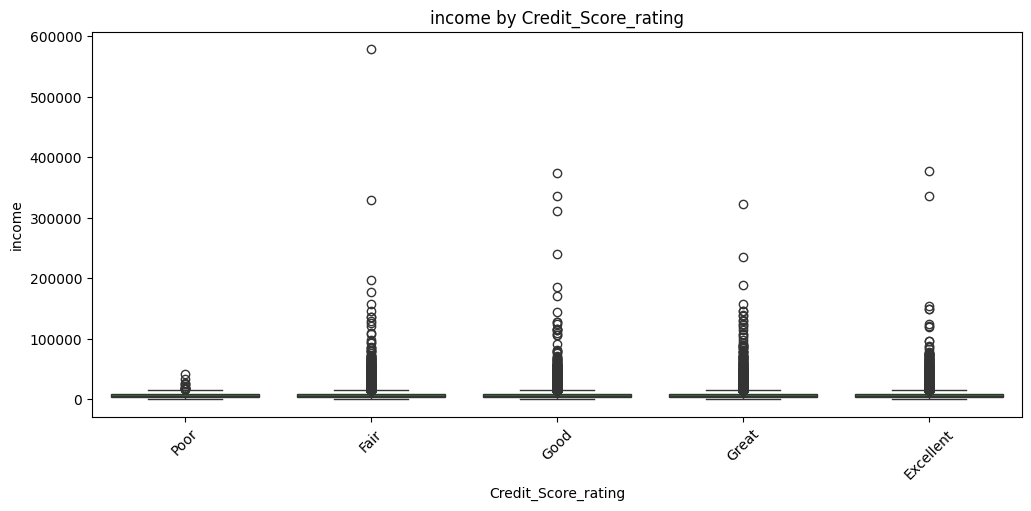

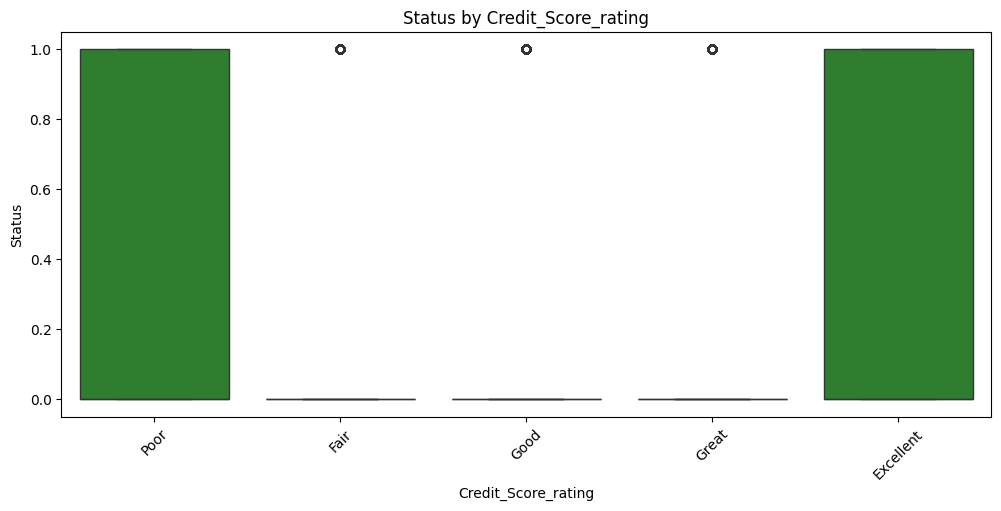

In [146]:
palette = ['#228B22']
for column in ['loan_limit', 'loan_type','Gender', 'business_or_commercial','loan_purpose','age','Region','Credit_Score_rating', ]:
    for i, num_column in enumerate(['loan_amount','rate_of_interest', 'income','Status']):
        plt.figure(figsize=(12, 5))
        sns.boxplot(x=df[column], y=df[num_column], palette=palette)
        plt.title(f'{num_column} by {column}')
        plt.xticks(rotation=45)
        plt.show()

#### <font color=#fa7f22>**2.  Analyze patterns and uncover insights into default tendencies**</font>


loan_type  loan_purpose
type1      p1              24.386538
           p2              30.752916
           p3              22.239690
           p4              21.770206
type2      p1              31.902164
           p2              46.924829
           p3              34.805468
           p4              35.750699
type3      p1              27.686275
           p2              88.888889
           p3              30.184029
           p4              18.735632
Name: Status, dtype: float64
Credit_Score_rating
Poor         28.291317
Fair         24.582538
Good         24.501302
Great        24.259244
Excellent    25.196638
Name: Status, dtype: float64
Income-to-Debt Ratio_bins
(-0.167, 33.375]      24.641396
(33.375, 66.749]      31.250000
(66.749, 100.124]     75.000000
(100.124, 133.499]          NaN
(133.499, 166.873]    50.000000
Name: Status, dtype: float64
LTV_bins
(-6.86, 1567.026]       24.644837
(1567.026, 3133.082]    50.000000
(3133.082, 4699.138]          NaN
(4699.138, 62

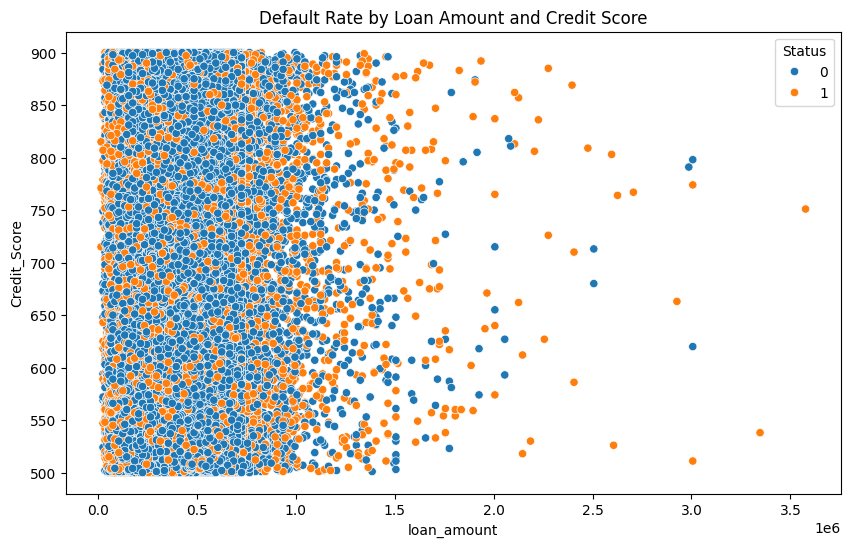

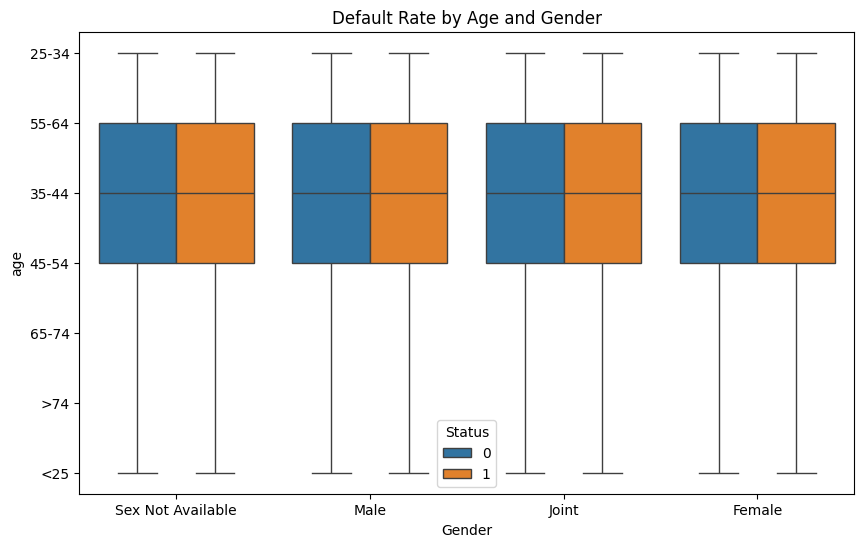

business_or_commercial
b/c      34.543878
nob/c    23.037652
Name: Status, dtype: float64


In [147]:
# 1. Default Rate by Loan Type and Purpose:
print(df.groupby(['loan_type', 'loan_purpose'])['Status'].mean() * 100)
# This shows the default rate for each combination of loan type and purpose.
# You can identify loan types/purposes with higher default rates.

# 2. Default Rate by Credit Score Rating:
print(df.groupby('Credit_Score_rating')['Status'].mean() * 100)
# This shows the default rate for each credit score rating category.
# You can see if borrowers with lower credit scores have higher default rates.

# 3. Default Rate by Income-to-Debt Ratio:
df['Income-to-Debt Ratio_bins'] = pd.cut(df['Income-to-Debt Ratio'], bins=5)
print(df.groupby('Income-to-Debt Ratio_bins')['Status'].mean() * 100)
# This shows the default rate for each income-to-debt ratio bin.
# You can see if borrowers with lower income-to-debt ratios have higher default rates.

# 4. Default Rate by LTV:
df['LTV_bins'] = pd.cut(df['LTV'], bins=5)
print(df.groupby('LTV_bins')['Status'].mean() * 100)
# This shows the default rate for each LTV bin.
# You can see if borrowers with higher LTVs have higher default rates.

# 5. Default Rate by Region:
print(df.groupby('Region')['Status'].mean() * 100)
# This shows the default rate for each region.
# You can see if certain regions have higher default rates.


# 6. Visualize Default Rate by Loan Amount and Credit Score:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amount', y='Credit_Score', hue='Status', data=df)
plt.title('Default Rate by Loan Amount and Credit Score')
plt.show()
# This plot can help visualize if higher loan amounts and lower credit scores are related to higher default rates.

# 7. Analyze Default Rate by Age and Gender:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='age', hue='Status', data=df)
plt.title('Default Rate by Age and Gender')
plt.show()
# This plot can help visualize if certain age groups and genders have higher default rates.


# 8. Analyze Default Rate by Business or Commercial Loans:
print(df.groupby('business_or_commercial')['Status'].mean() * 100)
# This shows the default rate for business vs. non-business loans.


**Loan Type & Purpose:**

For type2, p2 loans, the default rate is the highest at 46.92%, while type1, p3 has a lower default rate of 22.24%.
Type2 loans generally have higher default rates across all purposes compared to type1 and type3, especially for p2 and p4 purposes.

**Credit Score Rating:**

Individuals with a "Poor" credit score have the highest default rate at 28.29%, while those with a "Great" score have the lowest at 24.26%.
Interestingly, those with an "Excellent" credit score still have a higher default rate (25.20%) than individuals with a "Great" credit score.

**Income-to-Debt Ratio:**
The default rate is highest for individuals with an income-to-debt ratio in the (66.749, 100.124] range at a significant 75%, indicating a high-risk group.
There are no defaults recorded for the (100.124, 133.499] range, likely due to missing data, but defaults resume at 50% in the next higher bin.

**Loan-to-Value (LTV) Bins:**
The highest default rate (50%) occurs for loans in the (1567.026, 3133.082] LTV range, while other LTV ranges such as (4699.138, 7831.25] have no defaults, indicating that higher LTV values may correlate with fewer defaults.

**Region:**

The North-East region shows the highest default rate at 30.45%, followed by the Central region at 27.54%.
The North region has the lowest default rate at 22.51%.

**Type3, Purpose p2 Loans:**

Type3 loans for purpose p2 have a significantly high default rate at 88.89%, which is an outlier compared to other categories.

**Type2, Purpose p1 Loans:**

Type2 loans for purpose p1 also show a relatively high default rate of 31.90%, much higher than type1 for the same purpose.

**South Region:**

Defaults in the South region are 26.63%, indicating a moderate risk compared to the other regions.

#### <font color=#fa7f22>**3.  Investigating interactions between variables (e.g., loan type and credit score)**</font>

loan_type  Credit_Score_rating
type1      Poor                   24.637681
           Fair                   22.764199
           Good                   22.744407
           Great                  22.376874
           Excellent              23.191888
type2      Poor                   53.333333
           Fair                   34.098298
           Good                   34.209001
           Great                  34.014798
           Excellent              35.690821
type3      Poor                   25.000000
           Fair                   24.980111
           Good                   24.396201
           Great                  24.993050
           Excellent              25.863961
Name: Status, dtype: float64


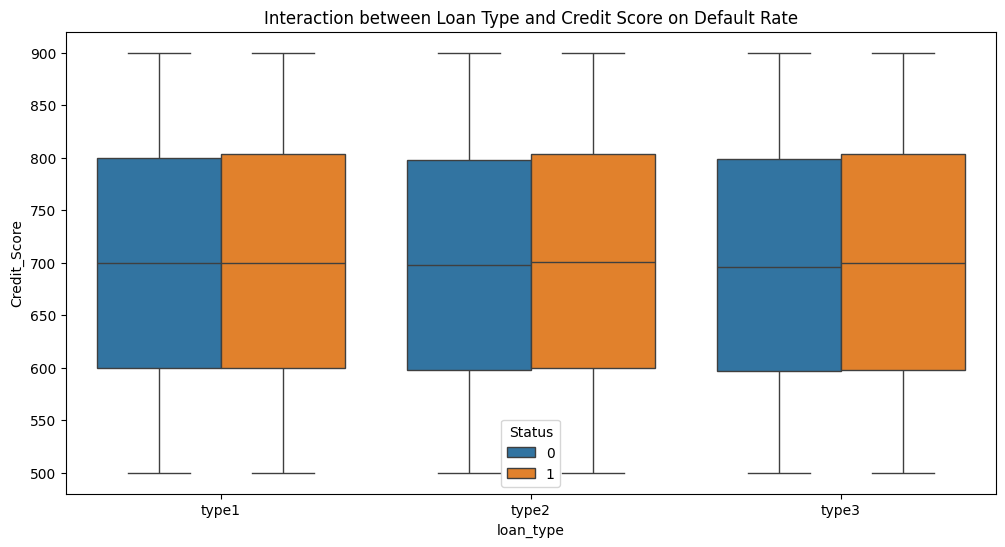

loan_purpose  income  
p1            0.0         100.0
              120.0       100.0
              180.0       100.0
              240.0       100.0
              300.0       100.0
                          ...  
p4            189360.0      0.0
              235980.0      0.0
              312000.0      0.0
              322860.0    100.0
              374400.0      0.0
Name: Status, Length: 2577, dtype: float64


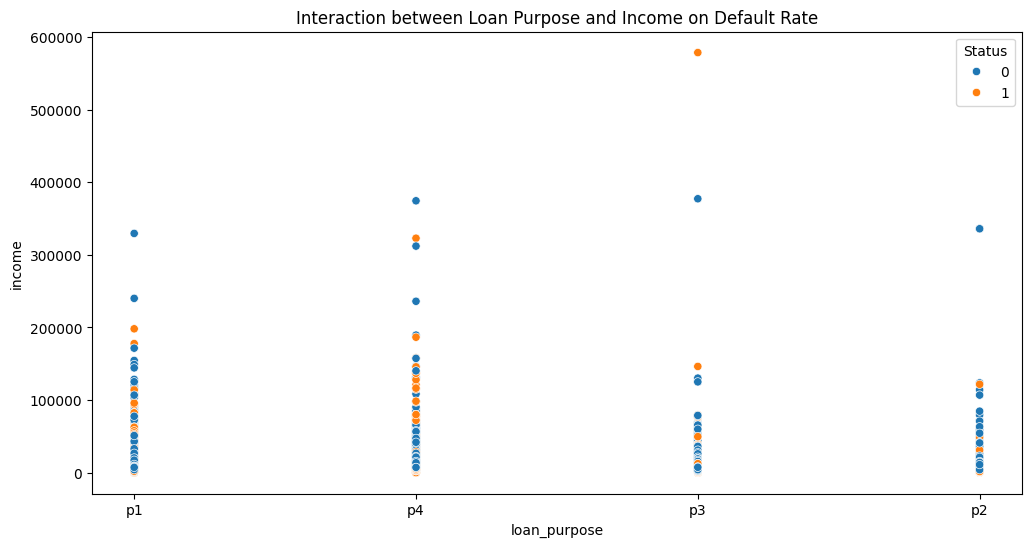

age    LTV       
25-34  6.090000        0.0
       8.230000        0.0
       8.590000        0.0
       11.650000       0.0
       12.340000       0.0
                     ...  
>74    149.640000    100.0
       155.074143    100.0
       177.840000    100.0
       201.040000    100.0
       201.320000    100.0
Name: Status, Length: 20370, dtype: float64


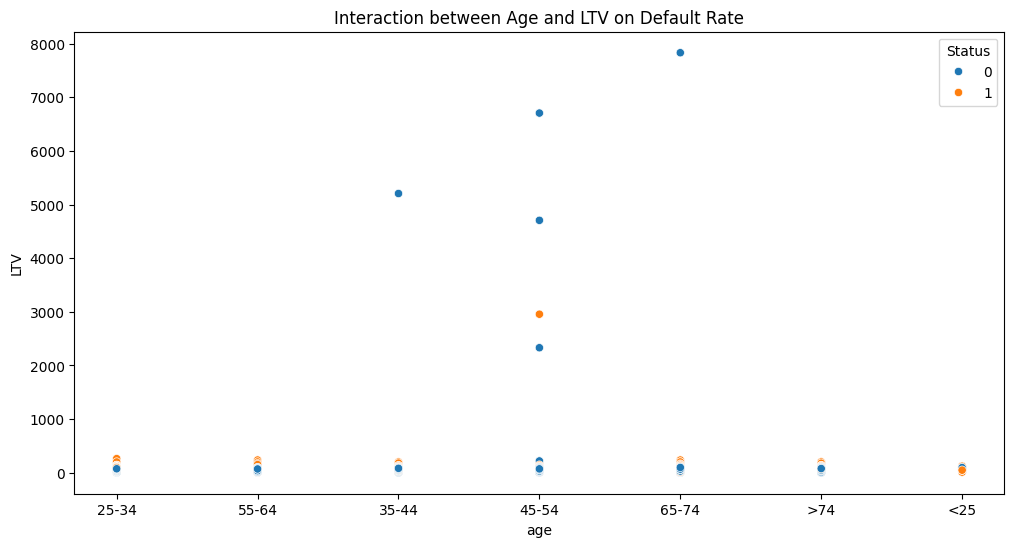

Region  loan_amount
North   16500          100.000000
        26500           33.333333
        36500           56.060606
        46500           45.045045
        56500           38.388626
                          ...    
south   2596500        100.000000
        2606500        100.000000
        2986500          0.000000
        3006500         66.666667
        3346500        100.000000
Name: Status, Length: 580, dtype: float64


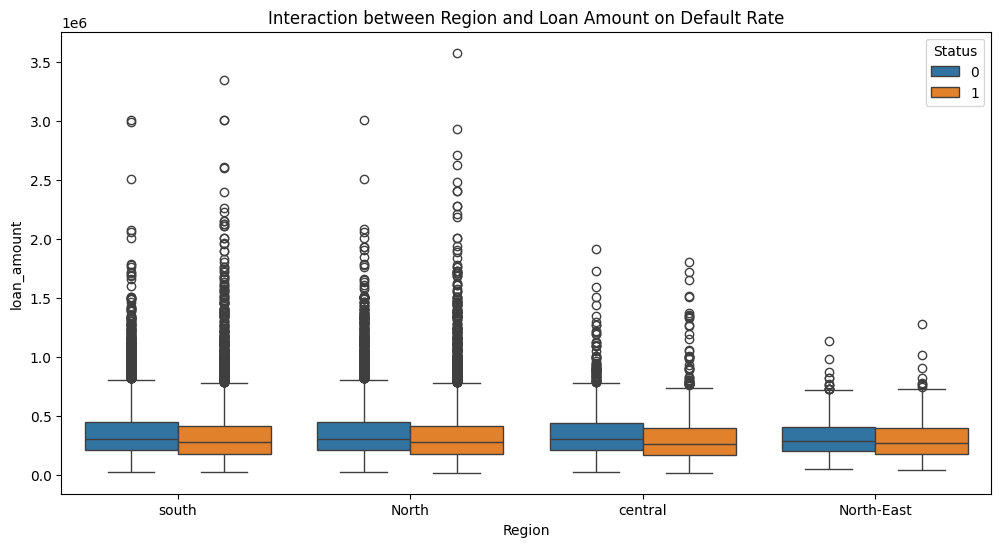

In [148]:
# Analyze the interaction between loan type and credit score on default rate
print(df.groupby(['loan_type', 'Credit_Score_rating'])['Status'].mean() * 100)

# Visualize the interaction using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_type', y='Credit_Score', hue='Status', data=df)
plt.title('Interaction between Loan Type and Credit Score on Default Rate')
plt.show()

# Analyze the interaction between loan purpose and income on default rate
print(df.groupby(['loan_purpose', 'income'])['Status'].mean() * 100)

# Visualize the interaction using a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='loan_purpose', y='income', hue='Status', data=df)
plt.title('Interaction between Loan Purpose and Income on Default Rate')
plt.show()


# Analyze the interaction between age and LTV on default rate
print(df.groupby(['age', 'LTV'])['Status'].mean() * 100)

# Visualize the interaction using a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='LTV', hue='Status', data=df)
plt.title('Interaction between Age and LTV on Default Rate')
plt.show()


# Analyze the interaction between region and loan amount on default rate
print(df.groupby(['Region', 'loan_amount'])['Status'].mean() * 100)

# Visualize the interaction using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='loan_amount', hue='Status', data=df)
plt.title('Interaction between Region and Loan Amount on Default Rate')
plt.show()


#### <font color=#fa7f22>**4.  Performing statistical tests to confirm observed patterns**</font>

In [135]:
from scipy.stats import chi2_contingency, ttest_ind

# 1. Chi-Square Test for Categorical Variables:

# Example: Test the relationship between Gender and default status
contingency_table = pd.crosstab(df['Gender'], df['Status'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-Square Test (Gender vs. Status):")
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

# If the p-value is less than your significance level (e.g., 0.05), you can reject the null hypothesis
# that loan type and default status are independent.

# 2. T-Test for Numerical Variables:

# Example: Test if the average loan amount differs between default and non-default groups
default_group = df[df['Status'] == 1]['loan_amount']
non_default_group = df[df['Status'] == 0]['loan_amount']
t_statistic, p_value = ttest_ind(default_group, non_default_group)
print("\nT-Test (Loan Amount vs. Status):")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# If the p-value is less than your significance level, you can reject the null hypothesis
# that the average loan amount is the same in both groups.

# 3. Chi-Square Test for Categorical Variables:

# Example: Test the relationship between Age and default status
contingency_table = pd.crosstab(df['age'], df['Status'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-Square Test (Age vs. Status):")
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")


# Chi-square for categorical variables and t-test for numerical variables.


Chi-Square Test (Gender vs. Status):
Chi-Square statistic: 1043.6008495787444
P-value: 6.260048330360408e-226

T-Test (Loan Amount vs. Status):
T-statistic: -14.208539142794285
P-value: 8.69062767980642e-46
Chi-Square Test (Age vs. Status):
Chi-Square statistic: 363.0003821085611
P-value: 2.4944698044217387e-75


Chi-Square Test (Gender vs. Status):

The Chi-Square statistic is extremely high (1043.60), and the p-value is very small (6.26e-226), which indicates a significant association between gender and loan status (e.g., default or non-default).
This suggests that gender has a statistically significant influence on loan status, though further analysis is needed to understand the nature of the relationship.
T-Test (Loan Amount vs. Status):

The T-statistic is highly negative (-14.21), and the p-value is extremely small (8.69e-46), indicating that there is a significant difference in loan amounts between defaulters and non-defaulters.
This suggests that the average loan amount for defaulters is statistically different (likely lower or higher) compared to non-defaulters.
Chi-Square Test (Age vs. Status):

The Chi-Square statistic is also high (363.00), with a very small p-value (2.49e-75), indicating a significant relationship between age and loan status.
Age has a statistically significant impact on whether individuals default on loans or not.

In [136]:
import scipy.stats as stats

# 1. Hypothesis Testing: Credit Score vs. Default
# Null Hypothesis (H0): There is no significant difference in default rates between different credit score ratings.
# Alternative Hypothesis (H1): There is a significant difference in default rates between different credit score ratings.

# Create contingency table
contingency_table = pd.crosstab(df['Credit_Score_rating'], df['Status'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test for Credit Score vs. Default:")
print("Chi-square statistic:", chi2)
print("P-value:", p)

# 2. Hypothesis Testing: Income-to-Debt Ratio vs. Default
# Null Hypothesis (H0): There is no significant difference in default rates between different income-to-debt ratio bins.
# Alternative Hypothesis (H1): There is a significant difference in default rates between different income-to-debt ratio bins.

# Create contingency table
contingency_table = pd.crosstab(df['Income-to-Debt Ratio_bins'], df['Status'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-Square Test for Income-to-Debt Ratio vs. Default:")
print("Chi-square statistic:", chi2)
print("P-value:", p)

# 3. Hypothesis Testing: LTV vs. Default
# Null Hypothesis (H0): There is no significant difference in default rates between different LTV bins.
# Alternative Hypothesis (H1): There is a significant difference in default rates between different LTV bins.

# Create contingency table
contingency_table = pd.crosstab(df['LTV_bins'], df['Status'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-Square Test for LTV vs. Default:")
print("Chi-square statistic:", chi2)
print("P-value:", p)

# 4. Hypothesis Testing: Region vs. Default
# Null Hypothesis (H0): There is no significant difference in default rates between different regions.
# Alternative Hypothesis (H1): There is a significant difference in default rates between different regions.

# Create contingency table
contingency_table = pd.crosstab(df['Region'], df['Status'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-Square Test for Region vs. Default:")
print("Chi-square statistic:", chi2)
print("P-value:", p)

# 5. Hypothesis Testing: Loan Type vs. Default
# Null Hypothesis (H0): There is no significant difference in default rates between different loan types.
# Alternative Hypothesis (H1): There is a significant difference in default rates between different loan types.

# Create contingency table
contingency_table = pd.crosstab(df['loan_type'], df['Status'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-Square Test for Loan Type vs. Default:")
print("Chi-square statistic:", chi2)
print("P-value:", p)

# 6. Hypothesis Testing: Loan Purpose vs. Default
# Null Hypothesis (H0): There is no significant difference in default rates between different loan purposes.
# Alternative Hypothesis (H1): There is a significant difference in default rates between different loan purposes.

# Create contingency table
contingency_table = pd.crosstab(df['loan_purpose'], df['Status'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-Square Test for Loan Purpose vs. Default:")
print("Chi-square statistic:", chi2)
print("P-value:", p)


# Based on the p-values, you can determine if the null hypothesis should be rejected.
# A p-value below a chosen significance level (e.g., 0.05) suggests evidence against the null hypothesis.
# This indicates that there is a significant association between the variable and the likelihood of default.


Chi-Square Test for Credit Score vs. Default:
Chi-square statistic: 12.076278679371518
P-value: 0.01679296042365449

Chi-Square Test for Income-to-Debt Ratio vs. Default:
Chi-square statistic: 6.906568660896359
P-value: 0.07493612697243256

Chi-Square Test for LTV vs. Default:
Chi-square statistic: 2.0005526741063435
P-value: 0.572292002813285

Chi-Square Test for Region vs. Default:
Chi-square statistic: 380.45633008939643
P-value: 3.7860568405811336e-82

Chi-Square Test for Loan Type vs. Default:
Chi-square statistic: 1309.9581425319489
P-value: 3.5172528245408e-285

Chi-Square Test for Loan Purpose vs. Default:
Chi-square statistic: 239.13053189422533
P-value: 1.4673280880876174e-51


Credit Score vs. Default:

Chi-square statistic: 12.08
P-value: 0.017
There is a statistically significant association between credit score and loan default, suggesting that credit scores influence default rates.
Income-to-Debt Ratio vs. Default:

Chi-square statistic: 6.91
P-value: 0.075
While the association is not statistically significant at the conventional 0.05 level, it approaches significance, indicating a potential relationship between the income-to-debt ratio and default risk.
LTV (Loan-to-Value Ratio) vs. Default:

Chi-square statistic: 2.00
P-value: 0.572
No significant association exists between LTV and loan default, suggesting that LTV may not be a strong predictor of default.
Region vs. Default:

Chi-square statistic: 380.46
P-value: 3.79e-82
A highly significant association between region and loan default indicates that default rates vary significantly across different regions.
Loan Type vs. Default:

Chi-square statistic: 1309.96
P-value: 3.52e-285
There is a very strong and statistically significant relationship between loan type and default, indicating that the type of loan greatly impacts default risk.
Loan Purpose vs. Default:

Chi-square statistic: 239.13
P-value: 1.47e-51
A significant association exists between loan purpose and default, showing that the reasons for taking a loan influence the likelihood of default.

#### <font color=#fa7f22>**5. Creating visualizations to compare default rates across different categories**</font>

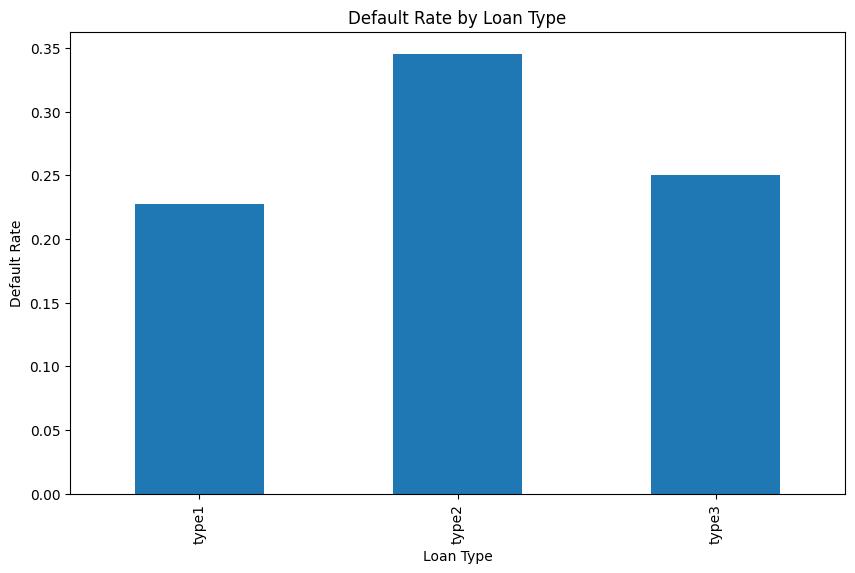

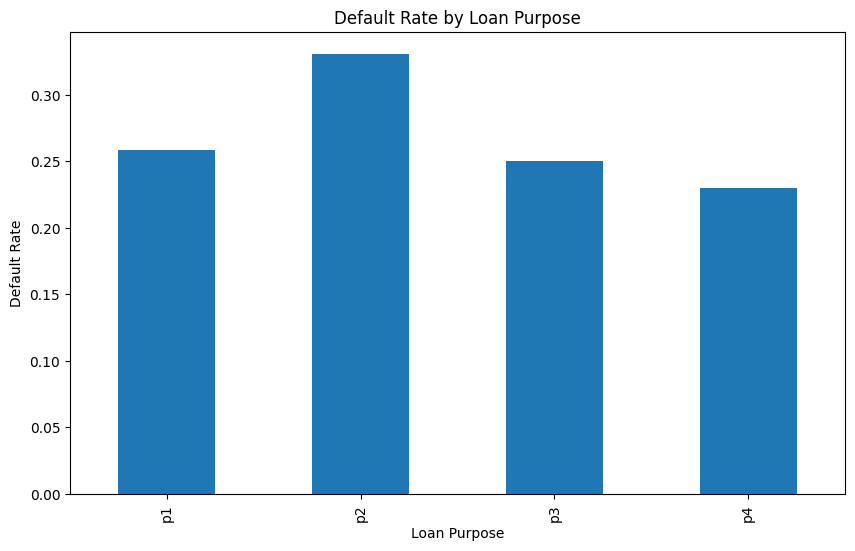

<ipython-input-137-b490632a19e3>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Credit_Score_rating')['Status'].mean().plot(kind='bar')


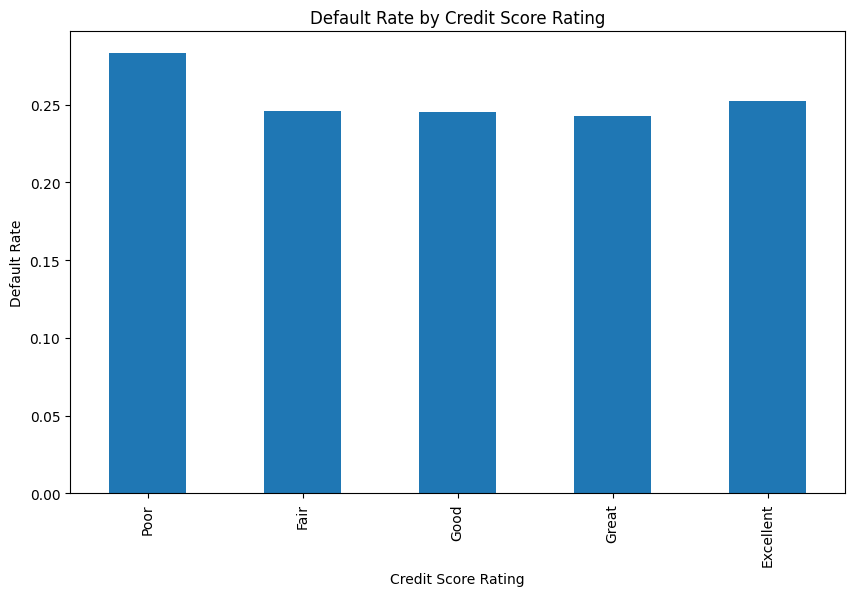

<ipython-input-137-b490632a19e3>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Income-to-Debt Ratio_bins')['Status'].mean().plot(kind='bar')


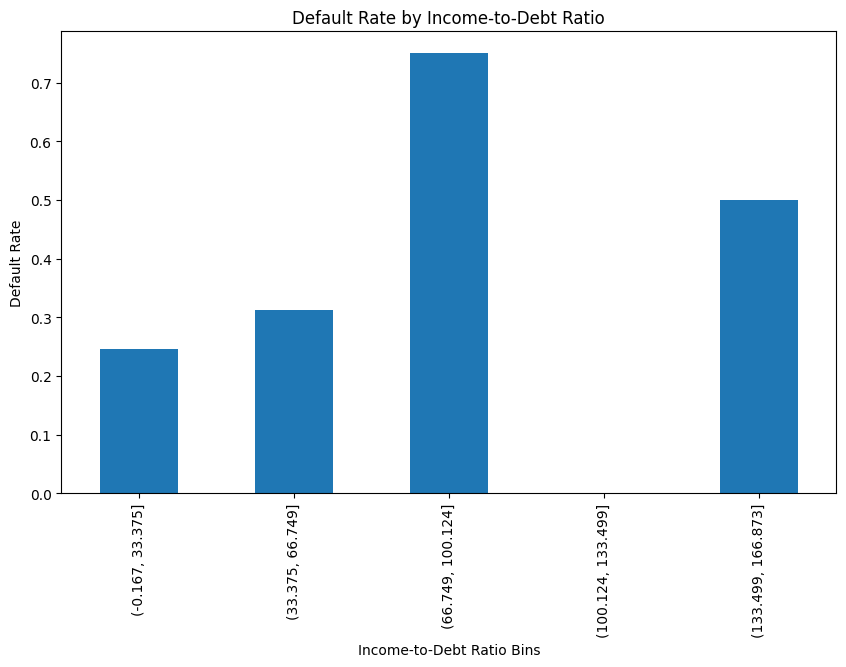

<ipython-input-137-b490632a19e3>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('LTV_bins')['Status'].mean().plot(kind='bar')


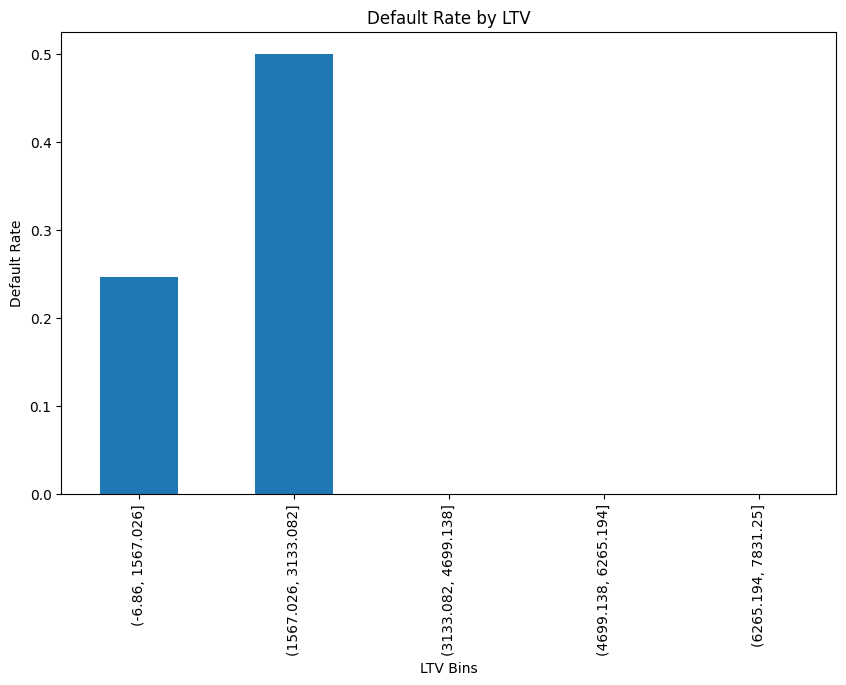

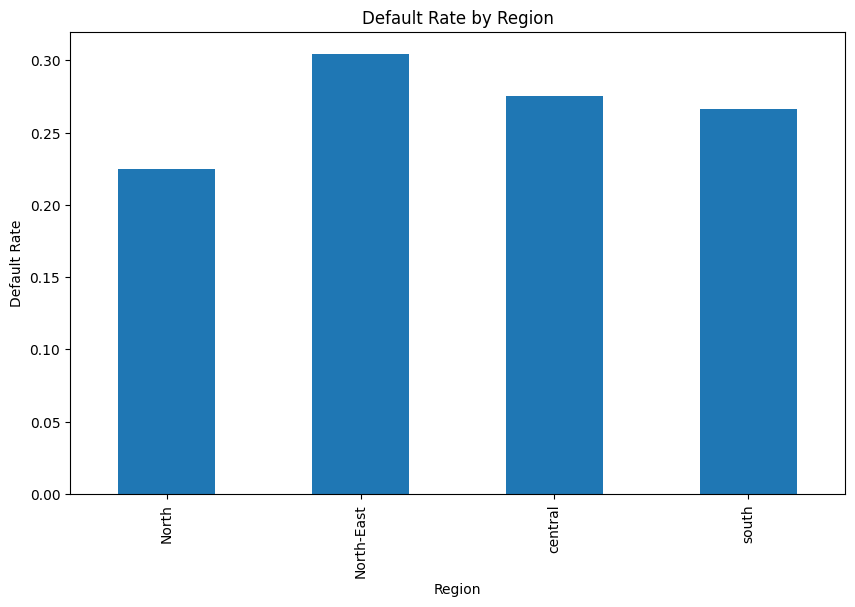

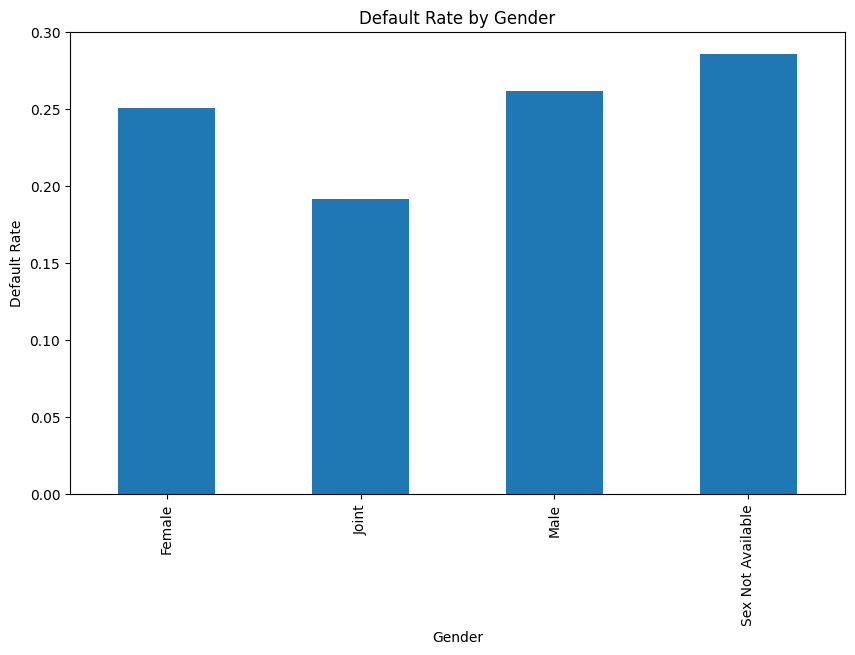

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

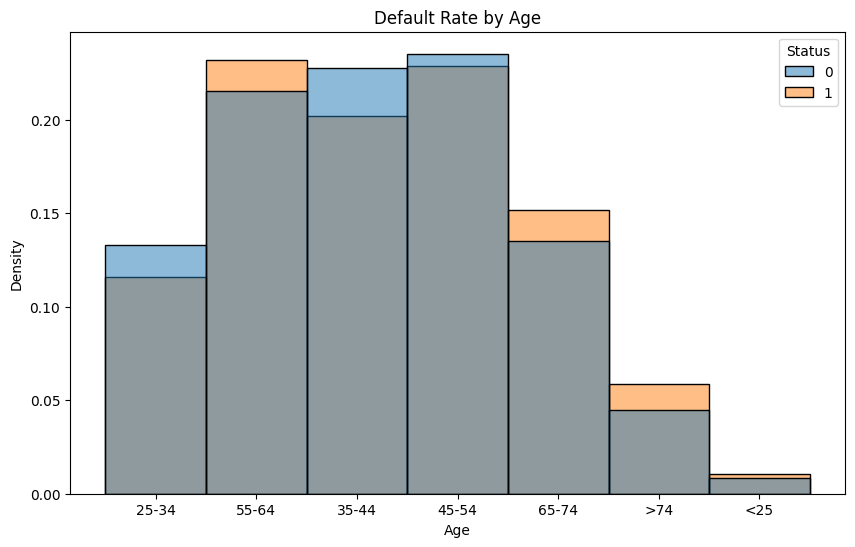

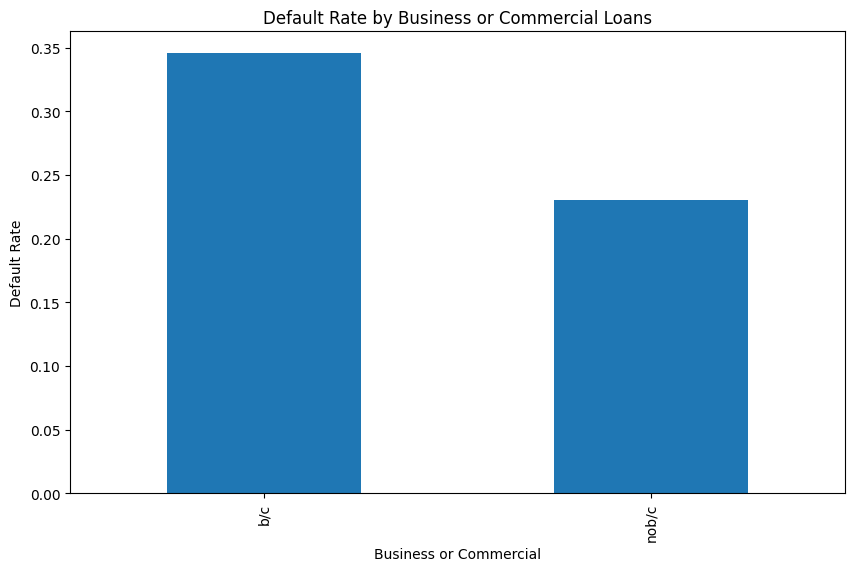

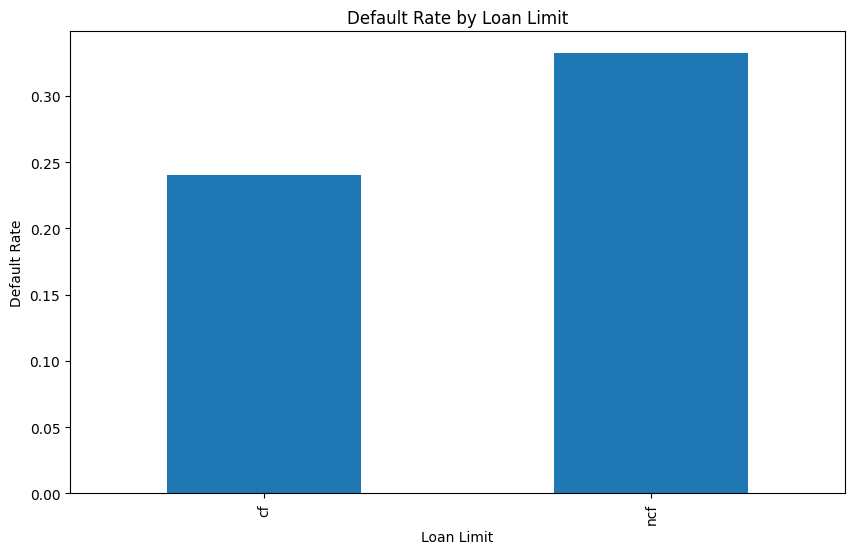

In [137]:
# 1. Default Rate by Loan Type
plt.figure(figsize=(10, 6))
df.groupby('loan_type')['Status'].mean().plot(kind='bar')
plt.title('Default Rate by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Default Rate')
plt.show()

# 2. Default Rate by Loan Purpose
plt.figure(figsize=(10, 6))
df.groupby('loan_purpose')['Status'].mean().plot(kind='bar')
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate')
plt.show()

# 3. Default Rate by Credit Score Rating
plt.figure(figsize=(10, 6))
df.groupby('Credit_Score_rating')['Status'].mean().plot(kind='bar')
plt.title('Default Rate by Credit Score Rating')
plt.xlabel('Credit Score Rating')
plt.ylabel('Default Rate')
plt.show()

# 4. Default Rate by Income-to-Debt Ratio Bins
plt.figure(figsize=(10, 6))
df.groupby('Income-to-Debt Ratio_bins')['Status'].mean().plot(kind='bar')
plt.title('Default Rate by Income-to-Debt Ratio')
plt.xlabel('Income-to-Debt Ratio Bins')
plt.ylabel('Default Rate')
plt.show()

# 5. Default Rate by LTV Bins
plt.figure(figsize=(10, 6))
df.groupby('LTV_bins')['Status'].mean().plot(kind='bar')
plt.title('Default Rate by LTV')
plt.xlabel('LTV Bins')
plt.ylabel('Default Rate')
plt.show()

# 6. Default Rate by Region
plt.figure(figsize=(10, 6))
df.groupby('Region')['Status'].mean().plot(kind='bar')
plt.title('Default Rate by Region')
plt.xlabel('Region')
plt.ylabel('Default Rate')
plt.show()

# 7. Default Rate by Gender
plt.figure(figsize=(10, 6))
df.groupby('Gender')['Status'].mean().plot(kind='bar')
plt.title('Default Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Default Rate')
plt.show()

# 8. Default Rate by Age (using a histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='Status', stat='density', common_norm=False)
plt.title('Default Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# 9. Default Rate by Business or Commercial Loans
plt.figure(figsize=(10, 6))
df.groupby('business_or_commercial')['Status'].mean().plot(kind='bar')
plt.title('Default Rate by Business or Commercial Loans')
plt.xlabel('Business or Commercial')
plt.ylabel('Default Rate')
plt.show()

# 10. Default Rate by Loan Limit
plt.figure(figsize=(10, 6))
df.groupby('loan_limit')['Status'].mean().plot(kind='bar')
plt.title('Default Rate by Loan Limit')
plt.xlabel('Loan Limit')
plt.ylabel('Default Rate')
plt.show()


## **9) Hypothetical calculation to find high risk customers**📊📈

In [122]:
# Assume we want to identify customers with a high risk of default based on multiple factors.
# We can create a risk score using a weighted average of relevant features.

# Example:
# - Credit Score: Lower score = higher risk (weight: 0.4)
# - LTV: Higher LTV = higher risk (weight: 0.3)
# - Income-to-Debt Ratio: Lower ratio = higher risk (weight: 0.2)
# - Loan Type: Certain types might have higher risk (weight: 0.1)

def calculate_risk_score(row):
  """Calculates a risk score for a customer based on multiple factors."""

  credit_score_weight = 0.4
  ltv_weight = 0.3
  income_to_debt_weight = 0.2
  loan_type_weight = 0.1

  credit_score_risk = (1000 - row['Credit_Score']) / 1000  # Normalize to 0-1, higher is riskier
  ltv_risk = row['LTV'] / 100  # Normalize to 0-1, higher is riskier
  income_to_debt_risk = (1 - row['Income-to-Debt Ratio'])  # Normalize to 0-1, higher is riskier
  if row['loan_type'] == 'P2':
    loan_type_risk = 0.6
  elif row['loan_type'] == 'P1':
    loan_type_risk = 0.4
  else:
    loan_type_risk = 0.2

  risk_score = (
      credit_score_risk * credit_score_weight
      + ltv_risk * ltv_weight
      + income_to_debt_risk * income_to_debt_weight
      + loan_type_risk * loan_type_weight
  )

  return risk_score

# Add a new column 'Risk_Score' to the DataFrame
df['Risk_Score'] = df.apply(calculate_risk_score, axis=1)

# Define a threshold for identifying high-risk customers (e.g., 0.7)
risk_threshold = 0.7

# Identify high-risk customers based on the threshold
high_risk_customers = df[df['Risk_Score'] >= risk_threshold]

# Analyze high-risk customers (e.g., view their characteristics, loan details)
print("High-Risk Customers:")
print(high_risk_customers[['ID','loan_amount', 'Credit_Score', 'LTV', 'Income-to-Debt Ratio','loan_type', 'Risk_Score']])



High-Risk Customers:
            ID  loan_amount  Credit_Score          LTV  Income-to-Debt Ratio  \
593      25483       136500           535    98.910000              0.000000   
8023     32913       726500           557   105.595930              0.000000   
16951    41841       626500           522  7831.250000              1.369513   
23798    48688       676500           522    98.328488              0.000000   
32652    57542       396500           538   102.190722              0.000000   
32990    57880       386500           517    99.613402              0.000000   
41313    66203       706500           543   102.688953              0.000000   
46287    71177       236500           724  2956.250000              2.308668   
47807    72697       416500           571  5206.250000              2.060024   
55286    80176       536500           591  6706.250000              1.599254   
59307    84197       736500           586   107.049419              0.000000   
64552    89442     

## **10) Analysis and Insights**

## Key Insights

1. **Loan Limit & Type**
   - **93%** of loans have a fixed limit, indicating a default lending approach.
   - **Loan Type 1** is the most common, while **Type 2** (commercial purpose) has the highest default rates.

2. **Loan Purpose**
   - Purposes P3 and P4 are most common, reflecting growing demand, while P2 is the least common (2%).

3. **Demographics**
   - **18%** of borrowers are female, suggesting potential inequalities in access to credit.
   - **60%** of customers aged **35-64** indicate stability, lowering default risk.

4. **Region**
   - North and South regions are overrepresented, highlighting potential market gaps in Central and North-East regions.
   - The North-East has the highest default rate (**30.45%**).

5. **Occupancy & Purpose**
   - **92%** of loans are for primary residences, focusing on residential ownership.
   - **86%** of loans serve non-commercial purposes, indicating lower default risk.

6. **Income & Debt Analysis**
   - Low **Income-to-Debt Ratios** (0-20) correlate with higher default risk; high ratios indicate strong repayment capability.
   - Extreme skewness in income and LTV suggests significant outliers affecting the distribution.

7. **Correlation Insights**
   - Strong positive correlations exist between loan amount, interest costs, and property value, aiding risk assessment.
   - Gender, age, and credit score significantly impact loan status and defaults.

8. **Loan Default Patterns**
   - The highest defaults are observed in Type 2 loans, particularly for purposes P1 and P2.
   - A credit score of **500** corresponds to the highest default rates.
   - Business or Commercial loans have more tendency to defaulting than non commercial loans.

## Recommendations

1. **Stricter Lending Criteria**
   - Implement more rigorous credit assessments for high-risk categories (e.g., Type 2 loans).

2. **Targeted Support**
   - Develop support programs for at-risk borrowers, particularly in demographics with higher default rates.

3. **Market Expansion**
   - Explore lending opportunities in underrepresented regions (Central and North-East) to diversify risk.

4. **Debt Management Guidance**
   - Provide financial education to borrowers, focusing on maintaining healthy income-to-debt ratios.

5. **Monitor High-Risk Loans**
   - Regularly assess loans with high LTV ratios and monitor default trends closely.

6. **Data-Driven Insights**
   - Utilize predictive analytics to identify potential defaulters early and adjust lending strategies accordingly.

7. **Enhance Gender-Inclusive Practices**
   - Create targeted campaigns to increase female borrowers' access to credit, addressing existing disparities.

8. **Risk Mitigation Strategies**
   - Establish a loan loss reserve fund to cushion against potential defaults, particularly in high-risk loan types.

By addressing these areas, the business can reduce the risk of loan defaults and improve overall lending performance.


###**Jupyter command to convert ipynb to html**

In [ ]:
!jupyter nbconvert --to html /content/Saranya_Loan_Default_Project.ipynb